## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

-  [Importing Libraries](#import_libraries)
-  [Loading first Dataset:Playstore](#loading_first_data_set)
    -  [DataCleaning (First Dataset:Playstore)](#data_cleaning_first_data_set)
    -  [Handling Outliers (First Dataset:Playstore)](#handling_outliers_first_set)
    -  [Beginining of Data Visualization of First Dataset : Playstore](#visualize_first_set)
 
-  [Loading (Second Dataset:User Reviews)](#loading_second_dataset)
     -  [DataCleaning (Second Dataset:User Reviews)](#data_cleaning_second_data_set)
     -  [Beginining of Data Visualization of Second Dataset : User Reviews](#visualize_second_set)
-  [Merging two Datsets (Playstore & User Reviews)](#merging_two_datasets)
    -  [Begining of Data Visualization of two Datsets (Playstore & User Reviews) ](#visualizing_combined_dataset)




<a id='import_libraries'></a>
## Importing libraries

In [2503]:
# Importing all the necessary datasets required for data analysis Pandas,numpy,and matplotlib,seaborn for visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import plotly.express as px

<a id='loading_first_data_set'>Loading First Dataset</a>


In [2504]:
# Importing data set and storing into the variable 
playstore_data=pd.read_csv("Play Store Data.csv")


# 1. Basic steps
1. Head of the dataset
2. Dataset shape
3. Check data type of every column
4. print descriptive summary

In [2505]:
# printing the first 5 rows in the dataset
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [2506]:
playstore_data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [2507]:
# Printing the shape of the dataset
playstore_data.shape

(10841, 13)

In [2508]:
# Printing the information of dataset to get the better idea about the datatype and memory used
playstore_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 8.3 MB


In [2509]:
# Printing the descriptive statistics
playstore_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### Right now when we try to look at the descriptive statistics of the play store data set,
 - We see only one numerical column from describe function
 
# 2. We need to figure out the columns that can be numerical 
## They are
 - Rating
 - Reviews
 - Size
 - Installs
 - Price
 
 
 ***Out of all the columns only Rating column in numerical***
 
 So we will start converting all the left out column's data type to numerical (int or float)

## 2.1 Conversion of Column:Reviews from object to float type

In [2510]:
# Printing the data type of Reviews 
playstore_data["Reviews"].dtype

dtype('O')

- Direct conversion of Reviews column may get some error if column contains any alphabets and special characters (non -digit)
- So in order to check we can use [isnumeric](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.isnumeric.html) function ***(to check if it contains only digits or not)***  to determine the no of rows having irregular data for conversion 

In [2511]:
playstore_data[~ playstore_data["Reviews"].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [2512]:
# The category, Rating and Reviews Column have irregular data so i'am dropping this row having an index 10472
print(playstore_data.shape)
playstore_data.drop(10472,inplace=True)
playstore_data.shape

(10841, 13)


(10840, 13)

In [2513]:
# Converting the values from object to float
print(playstore_data["Reviews"].dtype)
playstore_data["Reviews"]=playstore_data["Reviews"].astype('int64')
playstore_data["Reviews"].dtype

object


dtype('int64')

# 2.2 Conversion of Column :size from object to float
 - By looking at the unique data present in the ***size***  column  we have <br>
      1. Numbers like 8M , 10M etc which denotes that these data have MegaBytes as its unit <br>
      2. Numbers like 8.5k,23k,1020k etc which denotes that these data have Kilobytes as unit
      
      
 - So here lets convert all the units to Kilobyte for data analysis
 

In [2514]:
# Printing the data which have decimal values like 3.1M 2.7M which contains dot ( . )
playstore_data[playstore_data["Size"].str.find(".")!=-1]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [2515]:
# Printing unique values of Price
playstore_data["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [2516]:
# Creating a function to convert the all size to kilobyte units
def convert_to_kilobytes(size):
#     If the data is telling us the size varies with time then lets assign nan values to it
    if size == "Varies with device":
        return np.nan
#     If the data contains M it remmoves M convert it to float and it will be multiplied to float
    elif "M" in size:
        size=size.replace("M","")
        size=float(size)
        return round(size * 1000,2)
#     If the data contains K it remmoves k convert it to float 
    elif "k" in size:
        size=size.replace("k","")
        return round(float(size),2)

# Checking all the usecases of size conversion
convert_to_kilobytes('456.6656545465M')\
,convert_to_kilobytes('456.34k'),\
convert_to_kilobytes('456M'),\
convert_to_kilobytes('45.6M')

(456665.65, 456.34, 456000.0, 45600.0)

In [2517]:
values=playstore_data["Size"].apply(convert_to_kilobytes)
# checking if all rows are affecting 
values.shape

(10840,)

In [2518]:
# Printing first rows of dataset
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [2519]:
# Converting the sizes to kilobyte unit
playstore_data.Size=playstore_data.Size.apply(convert_to_kilobytes)

In [2520]:
# Printing the data type of Size column
playstore_data.Size.dtype

dtype('float64')

In [2521]:
# Checking the head of size conversion
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# 2.3 Conversion of Column : Installs to integer

 - The data contains string like '+' and ',' need to remove that and convert it into int type

In [2522]:
# So here we have + and , to be removed in order to convert into into integer data type
playstore_data.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [2523]:
# regex logic used 
pattern=r'[+,]'
# use cases of Removing + and , from stirng
re.sub(pattern,'',"10,000+"),re.sub(pattern,'',"10,00,000+")

('10000', '1000000')

In [2524]:
# Replacing the + and , from string
pattern=r'[+,]'
playstore_data.Installs=playstore_data.Installs.apply(lambda x: re.sub(pattern,'',x) )

In [2525]:
# Checking if all the unique numbers are appropraite to convert it into int 
playstore_data.Installs.unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [2526]:
# Conversion from Object to integer data type
playstore_data.Installs=playstore_data.Installs.astype("int64")
playstore_data.Installs.dtype

dtype('int64')

# 2.4 Conversion of column :Price from Object to float
 - It contains only dollar symbol ***'$'***
 
 - Remove  the ***$*** symbol
 - Convert the type to float


In [2527]:
# There are 92 unique values
playstore_data.Price.unique(),playstore_data.Price.unique().shape

(array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
        '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
        '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
        '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
        '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
        '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
        '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
        '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
        '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
        '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
        '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
        '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
        '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
        '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object),
 (9

In [2528]:
# Replace $ character from price to empty string 
playstore_data.Price=playstore_data.Price.str.replace("$","")

<ipython-input-2528-4d4d7b44acd7>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [2529]:
# Checkiing if all the data is appropriate to convert to flaot
playstore_data.Price.unique(),playstore_data.Price.unique().shape

(array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
        '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
        '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
        '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
        '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
        '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
        '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
        '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
        '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
        '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
        '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
        '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
        '1.20', '1.04'], dtype=object),
 (92,))

In [2530]:
# Converting Price column to flaot
playstore_data.Price=playstore_data.Price.astype('float')
playstore_data.Price.dtype

dtype('float64')

In [2531]:
# Printing the information to view the data type of the dataset
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [2532]:
# Lasted updated column in object form lets convert it into date date type
playstore_data["Last Updated"]=pd.to_datetime(playstore_data["Last Updated"])
# =playstore_data["Last Updated"]

In [2533]:
# Adding Year Month Date columns
playstore_data["Year"]=playstore_data["Last Updated"].dt.year
playstore_data["Month"]=playstore_data["Last Updated"].dt.month
playstore_data["Date"]=playstore_data["Last Updated"].dt.day


In [2534]:
# Printing the information to view the data type of the dataset
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Year            10840 non-null  int64         
 14  Month           10840 non-null  int64         
 15  Da

In [2535]:
# Printing the first 5 rows of playstore_data dataset
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month,Date
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1,7
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1,15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6,8
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6,20


<a id='data_cleaning_first_data_set'></a>

# 3. Data cleaning


In [2536]:
# Presenting the errors of the dataset in dataframe format
null_value_tables=pd.DataFrame({"No of Null values":playstore_data.isna().sum().sort_values(ascending=False),
                               "% of null vales":(playstore_data.isna().sum().sort_values(ascending=False)
                                                  /playstore_data.shape[0])*100}) 

In [2537]:
# Printing the value of No of null valus and % percentage of null values
null_value_tables

,No of Null values,% of null vales
Size,1695,15.636531
Rating,1474,13.597786
Current Ver,8,0.073801
Android Ver,2,0.018450
Type,1,0.009225
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Installs,0,0.000000
Price,0,0.000000


# 1. 15% of Size column are NaN
## 2. 13% of Rating columns are NaN
### 3. Current Version with 8 NaN
####  4.Andriod version with 2 and 
###### 5. Type with 1 NaN

## 3.1 Handling missing values for Size
 Adding overall mean values to the Size column might not feel appropriate as becasue usually 
  - Apps with category like Games will have more size and 
  - Apps with category of health will have slightly lesser size compared to games
  
  By looking at the table below we can tell that ***GAME*** has average maximum value followed by ***FAMILY*** and ***TRAVEL_AND_LOCAL*** and ***SPORTS*** and so on ...
 
 Conclusion - Group the apps by category and fill the mean values for missing places of there corresponding category

In [2538]:
# Storing the mean values of all the category
category_mean=playstore_data.groupby("Category").mean().sort_values("Size",ascending=False)["Size"]
# Printing the categories with there over all average
category_mean

Category
GAME                   44370.098522
FAMILY                 28319.250546
TRAVEL_AND_LOCAL       24654.494792
SPORTS                 24339.012862
HEALTH_AND_FITNESS     22769.212121
PARENTING              22512.962963
FOOD_AND_DRINK         22185.000000
ENTERTAINMENT          21853.333333
EDUCATION              20790.828829
AUTO_AND_VEHICLES      20037.146667
MEDICAL                19629.039171
FINANCE                17928.566775
SOCIAL                 17681.871429
PHOTOGRAPHY            17367.665354
DATING                 16625.556604
MAPS_AND_NAVIGATION    16614.712963
SHOPPING               16175.427861
VIDEO_PLAYERS          16084.580153
HOUSE_AND_HOME         15978.764706
LIFESTYLE              14754.498551
BUSINESS               14472.162500
EVENTS                 13963.754386
BEAUTY                 13795.744681
COMICS                 13485.352941
BOOKS_AND_REFERENCE    13310.822335
WEATHER                13124.245614
NEWS_AND_MAGAZINES     13023.648148
PRODUCTIVITY       

In [2539]:
# Storing the null values with mean of the category
playstore_data.loc[playstore_data["Size"].isna(),["Size"]]=\
playstore_data.loc[playstore_data.Size.isna()].apply(lambda x :round(category_mean[x['Category']],2),axis=1)

In [2540]:
# Presenting the errors of the dataset in dataframe format
null_value_tables=pd.DataFrame({"No of Null values":playstore_data.isna().sum().sort_values(ascending=False),
                               "% of null vales":(playstore_data.isna().sum().sort_values(ascending=False)
                                                  /playstore_data.shape[0])*100}) 
null_value_tables

,No of Null values,% of null vales
Rating,1474,13.597786
Current Ver,8,0.073801
Android Ver,2,0.018450
Type,1,0.009225
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Size,0,0.000000
Installs,0,0.000000
Price,0,0.000000


## 3.2 Handling missing values of Column: Rating 
 - Rating can be very random depending upon the customer satisfaction 
 

In [2541]:
'''This function assign_random_values will assign random values picked from non null values to the missing values (null val)

Steps taken in this function 
 Step 1 - n - get the length of sample you want by getting the length of null values in the feature
 Step 2 - remove the null values from the feature
 Step 3 -pick -n - number of sample required from null filter feature
 Step 4 -  get the index of null values from feature
 Step 5 - assign null values indices to picked sample indices
 Step 6 - Add that to the main dataset
 '''

def assign_random_values(feature):
    sample_length=  playstore_data[feature].isna().sum()
    sample_rating_value=playstore_data[~playstore_data[feature].isna()][feature].sample(sample_length)
    actual_null_list=playstore_data[playstore_data[feature].isna()]
    sample_rating_value.index=actual_null_list.index
    playstore_data.loc[playstore_data[feature].isna(),feature]=sample_rating_value
    

In [2542]:
# Replaced the missing values with sample picked values 
assign_random_values("Rating")

In [2543]:
# Printing the no of null values in the over all columns of dataset
playstore_data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
Year              0
Month             0
Date              0
dtype: int64

## 3.3 Left out columns having missing values are Andriod ver, Current ver and Type
 - The number of errors are negligible ***(less than 10)*** comapared to the length of overall dataset we can follow the same method used for filling missing values of Rating

In [2544]:
assign_random_values("Android Ver")
assign_random_values("Current Ver")
assign_random_values("Type")

In [2545]:
# Printing the no of null values in the over all columns of dataset
playstore_data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Year              0
Month             0
Date              0
dtype: int64

### So finally we have cleaned all the missing value from Ratings,Size,Andriod Ver,Current ver,Type

In [2546]:
# Presenting the errors of the dataset in dataframe format
null_value_tables=pd.DataFrame({"No of Null values":playstore_data.isna().sum().sort_values(ascending=False),
                               "% of null vales":(playstore_data.isna().sum().sort_values(ascending=False)
                                                  /playstore_data.shape[0])*100}) 
null_value_tables

,No of Null values,% of null vales
App,0,0.0
Category,0,0.0
Rating,0,0.0
Reviews,0,0.0
Size,0,0.0
Installs,0,0.0
Type,0,0.0
Price,0,0.0
Content Rating,0,0.0
Genres,0,0.0


## 3.4 Removing duplicate values

In [2547]:
# Printing the duplicate values from dataset
playstore_data[playstore_data.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month,Date
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,14472.16,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,2018,2,26
236,Box,BUSINESS,4.2,159872,14472.16,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,2018,7,31
239,Google My Business,BUSINESS,4.4,70991,14472.16,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,2018,7,24
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.00,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,2018,7,20
261,join.me - Simple Meetings,BUSINESS,4.0,6989,14472.16,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,2018,7,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,12981.42,10000000,Free,0.0,Everyone,Productivity,2018-04-06,Varies with device,Varies with device,2018,4,6
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,12981.42,1000000,Free,0.0,Everyone,Productivity,2018-08-06,Varies with device,Varies with device,2018,8,6
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,12981.42,100000000,Free,0.0,Everyone,Productivity,2018-06-27,Varies with device,Varies with device,2018,6,27
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86000.00,10000,Free,0.0,Everyone,Medical,2018-06-01,0.6.88,5.0 and up,2018,6,1


In [2548]:
# Removing duplicates from playstore dataset
playstore_data.drop_duplicates(inplace=True)

In [2549]:
# Checking if there is two rows in the same App name
playstore_data[playstore_data["App"]=="Slack"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month,Date
240,Slack,BUSINESS,4.4,51507,14472.16,5000000,Free,0.0,Everyone,Business,2018-08-02,Varies with device,Varies with device,2018,8,2
294,Slack,BUSINESS,4.4,51510,14472.16,5000000,Free,0.0,Everyone,Business,2018-08-02,Varies with device,Varies with device,2018,8,2


 - There are two slack apps rows in the dataset similarly we have Minecraft game also

In [2550]:
# Printing the duplicates with same app name 
playstore_data[playstore_data["App"].duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month,Date
285,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804,14472.16,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,2018,2,26
293,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859,35000.00,100000000,Free,0.0,Everyone,Business,2018-08-02,9.7.14188,4.1 and up,2018,8,2
294,Slack,BUSINESS,4.4,51510,14472.16,5000000,Free,0.0,Everyone,Business,2018-08-02,Varies with device,Varies with device,2018,8,2
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,11766.71,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,2018,8,1
383,imo free video calls and chat,COMMUNICATION,4.3,4785988,11000.00,500000000,Free,0.0,Everyone,Communication,2018-06-08,9.8.000000010501,4.0 and up,2018,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,Motorola FM Radio,VIDEO_PLAYERS,3.9,54815,16084.58,100000000,Free,0.0,Everyone,Video Players & Editors,2018-05-02,Varies with device,Varies with device,2018,5,2
10715,FarmersOnly Dating,DATING,3.0,1145,1400.00,100000,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up,2016,2,25
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4000.00,1000000,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up,2018,7,6
10730,FP Notebook,MEDICAL,4.5,410,60000.00,50000,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,2018,3,24


 - There are around 706 Apps duplicates

In [2551]:
# Removing the duplicates with same app name 
playstore_data=playstore_data[~playstore_data["App"].duplicated()]

In [2552]:
# printing the final length of the dataset after removing the duplicates
playstore_data.shape

(9659, 16)

In [2553]:
# Came through this problems while checking the scenario if Price for all paid type are greater than 0
# Problems I found here are
#  1. Type is Paid But the Price is zero and
#  2. Installs is Zero But we have 5 Ratings
# Conclusion here the data is inappropriate which might cause some confusion when compared to others
playstore_data[playstore_data["Type"]=="Paid"].sort_values("Price").head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month,Date
7107,CB Frequencies,TOOLS,4.0,5,1400.0,100,Paid,0.99,Everyone,Tools,2015-12-24,1.0,4.0.3 and up,2015,12,24
5846,YAKALA AY,GAME,4.8,0,14000.0,1,Paid,0.99,Everyone,Arcade,2018-07-07,1.0,4.1 and up,2018,7,7


In [2554]:
playstore_data.shape

(9659, 16)

In [2555]:
# Removing that row using index "9148"
playstore_data.drop(9148,inplace=True)
playstore_data.shape

(9658, 16)

## End of data cleaning

# Now the data is cleaned and the dataset is ready to export 
 - For further Data Visualization with tools Tableau

In [2556]:
# Exporting the dataset for visualization by other tool
playstore_data.to_csv("cleaned_play_store.csv")

# Now divide the dataset into 2 parts
 - Categorical columns
 - Numerical columns
  
#### Note - We can easily differentiate the dataset between categorial and numerical i.e
##### - group the columns with object type as categorical
##### - group the columns without object type as numerical

In [2557]:
# Listing out all the numerical columns
numerical_column=[x for x in playstore_data.columns if playstore_data[x].dtype !="O"]
numerical_column

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Last Updated',
 'Year',
 'Month',
 'Date']

In [2558]:
# Listing out all the categorical columns

catogorical_columns=[x for x in playstore_data.columns if playstore_data[x].dtype=="O"]
catogorical_columns

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [2559]:
# Storing all columns of numerical data
numerical_data=playstore_data[numerical_column]
numerical_data

,Rating,Reviews,Size,Installs,Price,Last Updated,Year,Month,Date
0,4.1,159,19000.00,10000,0.0,2018-01-07,2018,1,7
1,3.9,967,14000.00,500000,0.0,2018-01-15,2018,1,15
2,4.7,87510,8700.00,5000000,0.0,2018-08-01,2018,8,1
3,4.5,215644,25000.00,50000000,0.0,2018-06-08,2018,6,8
4,4.3,967,2800.00,100000,0.0,2018-06-20,2018,6,20
...,...,...,...,...,...,...,...,...,...
10836,4.5,38,53000.00,5000,0.0,2017-07-25,2017,7,25
10837,5.0,4,3600.00,100,0.0,2018-07-06,2018,7,6
10838,4.2,3,9500.00,1000,0.0,2017-01-20,2017,1,20
10839,4.5,114,13310.82,1000,0.0,2015-01-19,2015,1,19


In [2560]:
# Storing all columns of categorical data

catogorical_data=playstore_data[catogorical_columns]
catogorical_data

,App,Category,Type,Content Rating,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,1.1,4.4 and up
...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,Free,Everyone,Education,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,Free,Everyone,Education,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,Free,Everyone,Medical,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Free,Mature 17+,Books & Reference,Varies with device,Varies with device


<a id='loading_second_dataset'></a>

# 4 Loading the second dataset User Reviews

In [2561]:
# Importing the second dataset
user_reviews=pd.read_csv("User Reviews.csv")

## 4.1 Basic steps
1. Head of the dataset
2. Dataset shape
3. Check data type of every column
4. print descriptive summary

In [2562]:
# Printing the first 5 rows of the second dataset
user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [2563]:
user_reviews.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [2564]:
# Printing the shape of the second dataset
user_reviews.shape

(64295, 5)

In [2565]:
# Printing the information of the second dataset
user_reviews.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 16.3 MB


In [2566]:
# printing the descriptive statistics of the second dataset
user_reviews.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


<a id='data_cleaning_second_data_set'></a>

# 5 Data cleaning

In [2567]:
# Printing the total sum of the null values in all the columns 
user_reviews.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [2568]:
# There are around 26863 rows having null values in all 4 columns
# Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,

user_reviews.dropna(subset=['Translated_Review',"Sentiment","Sentiment_Polarity","Sentiment_Subjectivity"], how='all',
                    inplace=True)

In [2569]:
# Printing the total sum of the null values in all the columns 
user_reviews.isna().sum()

App                       0
Translated_Review         5
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [2570]:
# Printing the shape of the second dataset
user_reviews.shape

(37432, 5)

### There are 5 null values present in the Translated Review column 
#### -  Here we have COLUMNS of Sentiment_polarity and Sentiment_subjectivity with values as 0 which is totally not making any difference with the Sentiment as Neutral will de droping this

In [2571]:
# Droping the 5 rows which has nan values in Translated _review
user_reviews[user_reviews["Translated_Review"].isna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


In [2572]:
# Dropping 5 rows from Translaetd Review which are nan
user_reviews.dropna(subset=["Translated_Review"] ,inplace=True)

In [2573]:
# Printing the shape of the second dataset
user_reviews.shape

(37427, 5)

In [2574]:
# Printing the total sum of the null values in all the columns 
user_reviews.isna().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

### End Of Data Cleaning

### There is no need of removing duplicate values because multiple customers can give similar type of reviews

In [2575]:
# Export dataset which has under gone data cleaning
user_reviews.to_csv('clean_user_reviews.csv')

<a id='handling_outliers_first_set'></a>

# 6 Handling Outliers and Visualizing  First data set Play Store Data

In [2576]:
# Checking the descriptive statistics of selected numerical columns like Rating. Reviews,Size and Installs
numerical_data[["Rating","Reviews","Size","Installs"]].describe()

,Rating,Reviews,Size,Installs
count,9658.000000,9.658000e+03,9658.000000,9.658000e+03
mean,4.174011,2.166150e+05,20248.658076,7.778312e+06
std,0.533098,1.831413e+06,20635.939283,5.376100e+07
min,1.000000,0.000000e+00,8.500000,0.000000e+00
25%,4.000000,2.500000e+01,5300.000000,1.000000e+03
50%,4.300000,9.670000e+02,13217.535000,1.000000e+05
75%,4.500000,2.940800e+04,27000.000000,1.000000e+06
max,5.000000,7.815831e+07,100000.000000,1.000000e+09


In [2577]:
# find lower upper limit using IQR formula to filter outlier

def get_lower_upper_limit(dataframe,feature):
    '''
    dataframe = It refers to the dataset u use 
    
    feature = It refers to the column or feature which lower limit 
    and upper limit has to be found out
    
    Returns-
    This funtion returns the lower limit and upper limit respectively 
    it takes dataframe and column name as arguments
    
    '''
    quartile_1=dataframe[feature].quantile(.25)
    quartile_3=dataframe[feature].quantile(.75)
    interquantile_range=quartile_3-quartile_1
    uplimit=quartile_3 +(1.5 * interquantile_range)
    downlimit=quartile_1 -(1.5 * interquantile_range)
    return downlimit,uplimit
    

In [2578]:
# This function is used to set the nearest limit to the outliers
def replace_outliers_to_nearest_limit(dataframe,feature,set_down_limit=False,down_limit=0,set_up_limit=False,up_limit=0):
    '''
    dataframe = It refers to the dataset u use 
    
    feature = It refers to the column or feature which lower limit 
    and upper limit has to be found out
    
    set_down_limit (default)= False
    If set_down_limit=True it ignores the lower limit 
    and sets the custom lower limit given by uesr input
    
    down_limit (default)=0
    It assigns the down_limit value to lower limit when the argument 'set_down_limit' is True
    
    set_up_limit (default)= False
    If set_up_limit=True it ignores the upper limit 
    and sets the custom upper limit given by uesr input
    
    up_limit (default)=0
    It assigns the up_limit value to upper limit when the argument 'set_up_limit' is True
    
    '''
    downlimit,uplimit=get_lower_upper_limit(dataframe,feature)
    print(downlimit,uplimit)
    if set_down_limit: downlimit=down_limit;
    if set_up_limit: uplimit=up_limit;
    dataframe.loc[dataframe[feature] < downlimit,feature]=downlimit
    dataframe.loc[dataframe[feature] > uplimit,feature]=uplimit

In [2579]:
# Checking the descriptive statistics of numerical columns
numerical_data.describe()

,Rating,Reviews,Size,Installs,Price,Year,Month,Date
count,9658.000000,9.658000e+03,9658.000000,9.658000e+03,9658.000000,9658.00000,9658.000000,9658.000000
mean,4.174011,2.166150e+05,20248.658076,7.778312e+06,1.099413,2017.34562,6.364051,15.631704
std,0.533098,1.831413e+06,20635.939283,5.376100e+07,16.853021,1.13764,2.659746,9.430666
min,1.000000,0.000000e+00,8.500000,0.000000e+00,0.000000,2010.00000,1.000000,1.000000
25%,4.000000,2.500000e+01,5300.000000,1.000000e+03,0.000000,2017.00000,5.000000,7.000000
50%,4.300000,9.670000e+02,13217.535000,1.000000e+05,0.000000,2018.00000,7.000000,16.000000
75%,4.500000,2.940800e+04,27000.000000,1.000000e+06,0.000000,2018.00000,8.000000,24.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000,2018.00000,12.000000,31.000000


## 6.1 Handling Size outliers

In [2580]:
# Getting the lower and upper limit of the Size column calculated by using IQR formula
get_lower_upper_limit(playstore_data,"Size")


(-27250.0, 59550.0)

#### Note - Need to ignore the minus sign in the lower limit because size cant be negative or even zero MB
 - The uplimit and downlimit are ***(smallest memory size) 8.5kb*** and 61MB for the over all apps
 - Box plot for the over all size will look something like the section below

C:\Users\Melon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Size'>

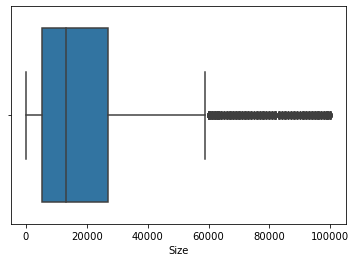

In [2581]:
# Visualizing the box plot for Size
sns.boxplot(playstore_data.Size)

In [2582]:
# Checking the descriptive statistics for Size column
playstore_data.Size.describe()

count      9658.000000
mean      20248.658076
std       20635.939283
min           8.500000
25%        5300.000000
50%       13217.535000
75%       27000.000000
max      100000.000000
Name: Size, dtype: float64

In [2583]:
# The outliers has been reset to the nearest limits
replace_outliers_to_nearest_limit(playstore_data,"Size",set_down_limit=True,down_limit=8.5)

-27250.0 59550.0


NOTE - downlimit is -27MB size can be negative or zero
- In the Size columns the uplimit and downlimit are between 8.5kb to 61MB <br>
 Why 8.5 kb ?? - Because its the smallest memory size nearest to 0
- Now in the box plot in the cell below we dont see any outliers

C:\Users\Melon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Size'>

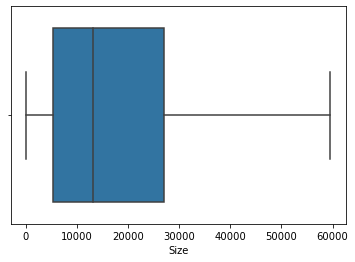

In [2584]:
# Visualizing the box plot for Size
sns.boxplot(playstore_data.Size)

## 6.2 Handling Rating outliers

In [2585]:
# Getting the lower and upper limit of the Rating column calculated by using IQR formula
get_lower_upper_limit(playstore_data,"Rating")

(3.25, 5.25)

#### Note - Need to ignore the values more than 5 in the upper limit because max rating that a customer can give is 5
 - The uplimit and downlimit of ratings are 3.25 to 5
 - Box plot for the over all Rating will look something like the section below

C:\Users\Melon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Rating'>

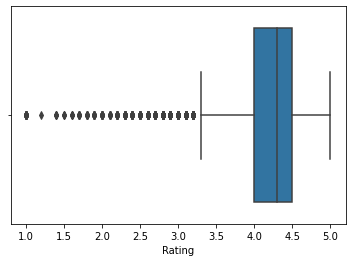

In [2586]:
# Visualizing the box plot for Rating
sns.boxplot(playstore_data.Rating)

In [2587]:
# The outliers has been reset to the nearest limits
replace_outliers_to_nearest_limit(playstore_data,"Rating",set_up_limit=True,up_limit=5)


3.25 5.25


#### Note - Need to ignore the values more than 5 in the upper limit because max rating that a customer can give is 5
- In the Rating columns the uplimit and downlimit are between 3.25 to 5 <br>
- Now in the box plot in the cell below we dont see any outliers

C:\Users\Melon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Rating'>

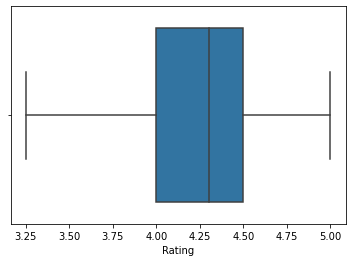

In [2588]:
# Visualizing the box plot for Rating
sns.boxplot(playstore_data.Rating)

## 6.3 Handling Reviews outliers

In [2589]:
# Getting the lower and upper limit of the Reviews column calculated by using IQR formula
get_lower_upper_limit(playstore_data,"Reviews")

(-44049.5, 73482.5)

#### Note - Need to ignore the negative value in the lower limit because min Reviews that an app can get is 0
 - The uplimit and downlimit of ratings are 0 and 115844
 - Box plot for the over all Review will look something like the section below

C:\Users\Melon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Reviews'>

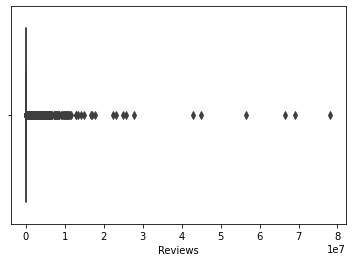

In [2590]:
# Visualizing the box plot for Reviews
sns.boxplot(playstore_data.Reviews)

In [2591]:
# The outliers has been reset to the nearest limits
replace_outliers_to_nearest_limit(playstore_data,"Reviews",set_down_limit=True,down_limit=0)


-44049.5 73482.5


#### Note - Need to ignore the negative value in the lower limit because min Reviews that an app can get is 0
 - The uplimit and downlimit of ratings are 0 and 115844
 - Now in the box plot in the cell below we dont see any outliers

C:\Users\Melon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Reviews'>

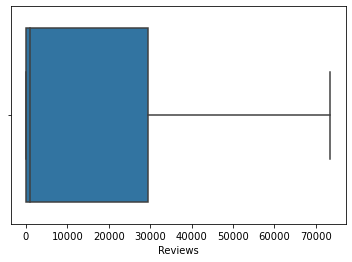

In [2592]:
# Visualizing the box plot for Reviews
sns.boxplot(playstore_data.Reviews)

## 6.4 Handling Price outliers
 - While handling price outliers we need to filter the data from app having type as ***Paid*** and finding its outlier

In [2593]:
# Filtering paid apps from all apps and storing it in a variable
paid_apps=playstore_data[playstore_data["Type"]=="Paid"]

In [2594]:
# Printing the shape of paid apps dataset
paid_apps.shape

(756, 16)

In [2595]:
# Price the first 5 rows of paid apps dataset
paid_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month,Date
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.70,11442.0,6800.00,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,2018,3,25
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.80,10295.0,39000.00,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,2017,4,11
427,Puffin Browser Pro,COMMUNICATION,4.00,18247.0,11766.71,100000,Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up,2018,7,5
476,"Moco+ - Chat, Meet People",DATING,4.20,1545.0,16625.56,10000,Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up,2018,6,19
477,Calculator,DATING,3.25,57.0,6200.00,1000,Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up,2017,10,25


In [2596]:
# Checking the descriptive stastistics of Price column
paid_apps.Price.describe()

count    756.000000
mean      14.045146
std       58.743615
min        0.990000
25%        1.490000
50%        2.990000
75%        4.990000
max      400.000000
Name: Price, dtype: float64

In [2597]:
# Printing all the paid apps 
paid_apps[paid_apps["Price"]!=0].sort_values("Price")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month,Date
7107,CB Frequencies,TOOLS,4.0,5.0,1400.0,100,Paid,0.99,Everyone,Tools,2015-12-24,1.0,4.0.3 and up,2015,12,24
5846,YAKALA AY,GAME,4.8,0.0,14000.0,1,Paid,0.99,Everyone,Arcade,2018-07-07,1.0,4.1 and up,2018,7,7
5961,Ice Crush 10.000 B.C.,FAMILY,4.4,31.0,4200.0,100,Paid,0.99,Everyone,Casual,2013-08-15,1.48,2.0 and up,2013,8,15
6088,Wolf of the BF:Commando MOBILE,GAME,3.4,32.0,27000.0,1000,Paid,0.99,Everyone 10+,Arcade,2017-03-23,1.00.10,4.0 and up,2017,3,23
7730,UFO-CQ,TOOLS,4.0,1.0,237.0,10,Paid,0.99,Everyone,Tools,2016-07-04,Release 1.0,2.0 and up,2016,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5354,I am Rich Plus,FAMILY,4.0,856.0,8700.0,10000,Paid,399.99,Everyone,Entertainment,2018-05-19,3.0,4.4 and up,2018,5,19
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26000.0,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up,2018,3,11
5369,I am Rich,FINANCE,4.3,180.0,3800.0,5000,Paid,399.99,Everyone,Finance,2018-03-22,1.0,4.2 and up,2018,3,22
5362,I Am Rich Pro,FAMILY,4.4,201.0,2700.0,5000,Paid,399.99,Everyone,Entertainment,2017-05-30,1.54,1.6 and up,2017,5,30


In [2598]:
# Getting the lower and upper limit of the Price column calculated by using IQR formula
get_lower_upper_limit(paid_apps,"Price")

(-3.76, 10.24)

#### Note - Need to ignore the negative value in the lower limit because min Price can't less than 0 dollars
 - The uplimit and downlimit of ratings are 0 and 10.24
 - Box plot for the over all Review will look something like the section below

C:\Users\Melon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Price'>

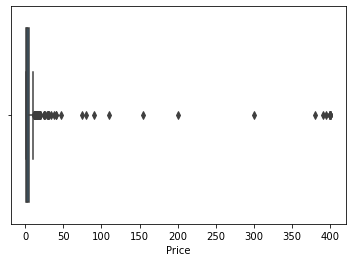

In [2599]:
# Visualizing the box plot for Price
sns.boxplot(paid_apps.Price)

In [2600]:
# The outliers has been reset to the nearest limits
replace_outliers_to_nearest_limit(paid_apps,"Price",set_down_limit=True,down_limit=.99)


-3.76 10.24


C:\Users\Melon\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Melon\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Note - Need to ignore the negative value in the lower limit because min Price can't less than 0 dollars
 - The uplimit and downlimit of ratings are .99 and 10.24 <br>
 WHY?? .99 Becasue it nearest values to the lowwe limit and paid apps cant be 0 dollars
 
 - Now in the box plot in the cell below we dont see any outliers

C:\Users\Melon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Price'>

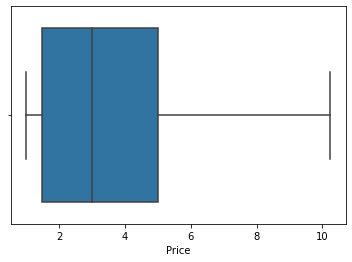

In [2601]:
# Visualizing the box plot for Price
sns.boxplot(paid_apps.Price)

# 7 EDA
Now lets explore 
 - insights of data
 - get some data patterns,trends
 

<a id='visualize_first_set'></a>


## 7.1 Correlation matrix (first Dataset)

In [2602]:
# Correlation between the numerical data
numerical_data.corr()

,Rating,Reviews,Size,Installs,Price,Year,Month,Date
Rating,1.000000,0.050842,0.051062,0.036937,-0.016883,0.110753,0.005505,-0.005286
Reviews,0.050842,1.000000,0.077528,0.625164,-0.007599,0.058081,0.036539,-0.033086
Size,0.051062,0.077528,1.000000,0.042935,-0.021810,0.196426,0.031295,-0.009913
Installs,0.036937,0.625164,0.042935,1.000000,-0.009406,0.068849,0.043176,-0.042020
Price,-0.016883,-0.007599,-0.021810,-0.009406,1.000000,-0.003604,0.007347,-0.009098
Year,0.110753,0.058081,0.196426,0.068849,-0.003604,1.000000,-0.199901,-0.015150
Month,0.005505,0.036539,0.031295,0.043176,0.007347,-0.199901,1.000000,-0.066553
Date,-0.005286,-0.033086,-0.009913,-0.042020,-0.009098,-0.015150,-0.066553,1.000000


In [2603]:
# Storing the correlation of numerical data into a variable
correlation_matrix=numerical_data.corr()

<a id='corelation_matrix_first_dataset'></a>

<AxesSubplot:title={'center':'Heat map of numerical columns'}>

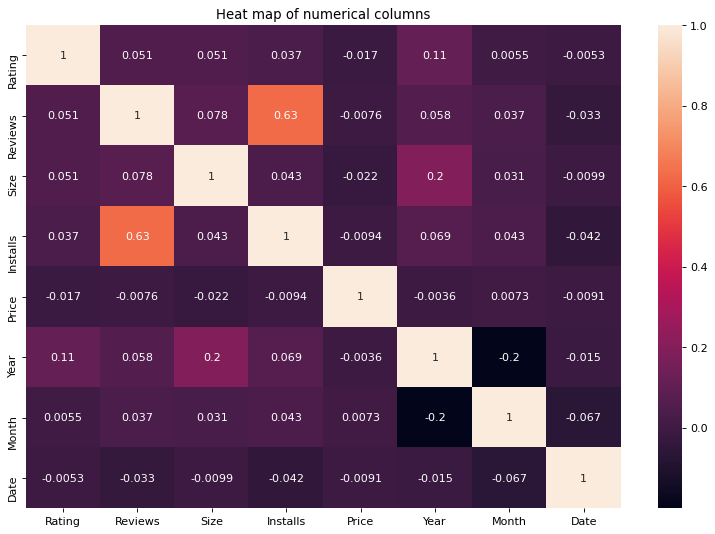

In [2604]:
# setting the size of the figure
plt.figure(figsize=(12,8),dpi=80)
# Assigning title
plt.title('Heat map of numerical columns')
# Visualizing heat map of correlation of numerical data
sns.heatmap(correlation_matrix,annot=True)

 - by this heatmap we have conclude as ***installs*** is highly correlated with ***reviews*** with value of .63
 - correlation between ***Installs*** and ***Reviews*** is positive
 <a id="corelation_matrix_first_dataset_scatter_plot"></a> 

<AxesSubplot:xlabel='Installs', ylabel='Reviews'>

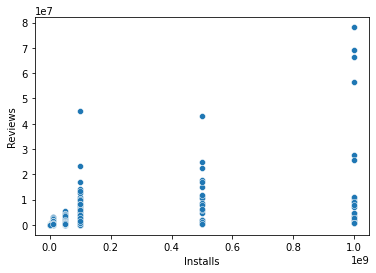

In [2605]:
# Visualizing scatter plot of Installs vs Reviews
sns.scatterplot(x=numerical_data["Installs"],y=numerical_data["Reviews"])

 - these two columns are highly correlated and positive with a value of .63 compared to correlation between other columns

## 7.2 Category column

In [2606]:
# Printing the values of counts of values of Category
catogorical_data["Category"].value_counts()

FAMILY                 1831
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

<a id ="most_apps_in_category"></a>
### 7.2.1 Which are the top 10  categories that has the maximum number of apps

<AxesSubplot:title={'center':' top 10 categories that has the maximum number of apps'}, xlabel='Category', ylabel='count'>

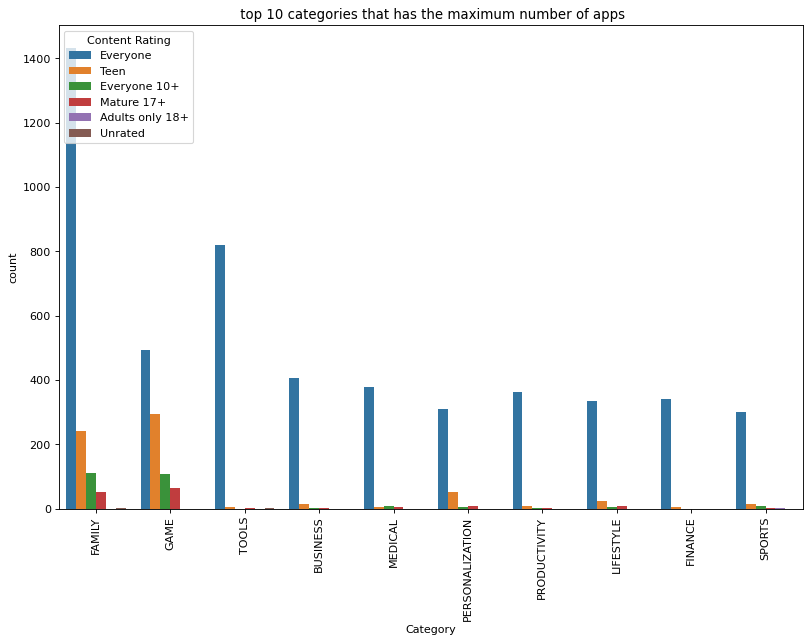

In [2607]:
# setting the size of the figure
plt.figure(figsize=(12, 8), dpi=80)
# rotating the x axis labels to 90 degree
plt.xticks(rotation=90) 
# Assigning title
plt.title(' top 10 categories that has the maximum number of apps')
# Renaming label for y axis
plt.ylabel('No of Apps')
# Visualizing the countplot of Categories in the dataset
sns.countplot(x="Category",data=catogorical_data,hue="Content Rating",order=catogorical_data['Category'].value_counts().iloc[:10].index)



- These are top 10 categories in which maximum apps have been developed

## 7.3 Which are the top 10 apps has made more profit? (PAID APP)
 1. To calculate the profit of apps 
     - You need to filter paid apps
     - Multiply price with installs to get total profit

In [2608]:
play_store_paid=playstore_data[playstore_data["Type"]=="Paid"]

In [2609]:
play_store_paid["Total_profit"]=play_store_paid["Installs"]*play_store_paid["Price"]

<ipython-input-2609-49b876cb3a78>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [2610]:
# Printing the first top 10 values of Total_profit
play_store_paid.sort_values("Total_profit",ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month,Date,Total_profit
2241,Minecraft,FAMILY,4.5,73482.5,28319.25,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device,2018,7,24,69900000.0
5351,I am rich,LIFESTYLE,3.8,3547.0,1800.00,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up,2018,1,12,39999000.0
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4700.00,50000,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up,2017,11,12,19999500.0
4034,Hitman Sniper,GAME,4.6,73482.5,29000.00,10000000,Paid,0.99,Mature 17+,Action,2018-07-12,1.7.110758,4.1 and up,2018,7,12,9900000.0
7417,Grand Theft Auto: San Andreas,GAME,4.4,73482.5,26000.00,1000000,Paid,6.99,Mature 17+,Action,2015-03-21,1.08,3.0 and up,2015,3,21,6990000.0
2883,Facetune - For Free,PHOTOGRAPHY,4.4,49553.0,48000.00,1000000,Paid,5.99,Everyone,Photography,2018-07-25,1.3.1,4.1 and up,2018,7,25,5990000.0
5578,Sleep as Android Unlock,LIFESTYLE,4.5,23966.0,872.00,1000000,Paid,5.99,Everyone,Lifestyle,2018-06-27,20180608,4.0 and up,2018,6,27,5990000.0
8804,DraStic DS Emulator,GAME,4.6,73482.5,12000.00,1000000,Paid,4.99,Everyone,Action,2016-07-19,r2.5.0.3a,2.3 and up,2016,7,19,4990000.0
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7300.00,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up,2018,5,3,4000000.0
5354,I am Rich Plus,FAMILY,4.0,856.0,8700.00,10000,Paid,399.99,Everyone,Entertainment,2018-05-19,3.0,4.4 and up,2018,5,19,3999900.0


<a id ="most_profit_making_paid_app"></a>

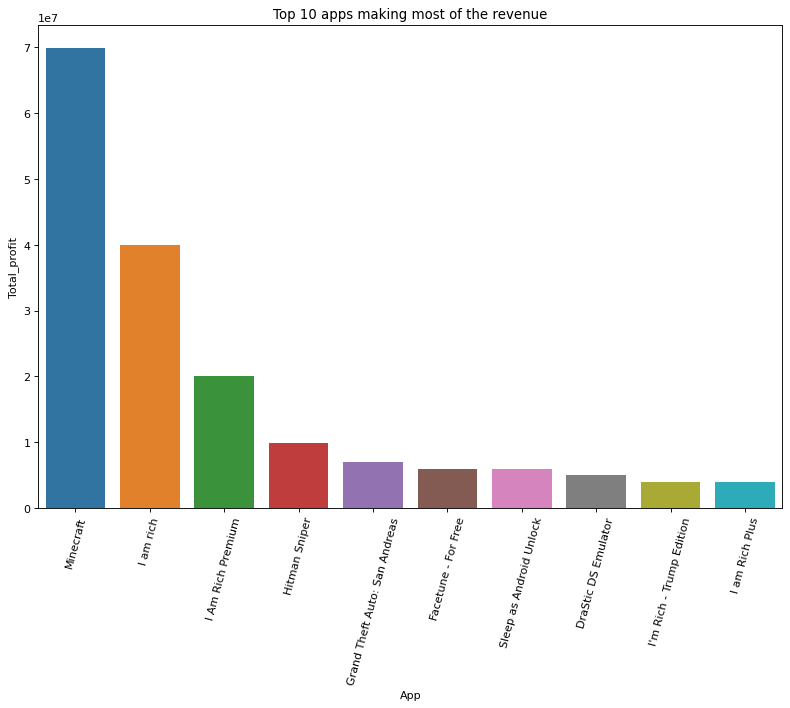

In [2611]:
# setting the size of the figure
plt.figure(figsize=(12, 8), dpi=80)
# rotating the x axis labels to 75 degree
plt.xticks(rotation=75,)
# Assigning title
plt.title('Top 10 apps making most of the revenue')
# Renaming label for y axis
plt.ylabel('Total Profit')
# Visualizing the barplot of top 10 total profit making apps
sns.barplot(x="App",y='Total_profit',data=play_store_paid.sort_values("Total_profit",ascending=False).head(10))
plt.show()

- These are the top 10 apps making profit <br>
Conclusion - Maximum profit making app is from GAME category

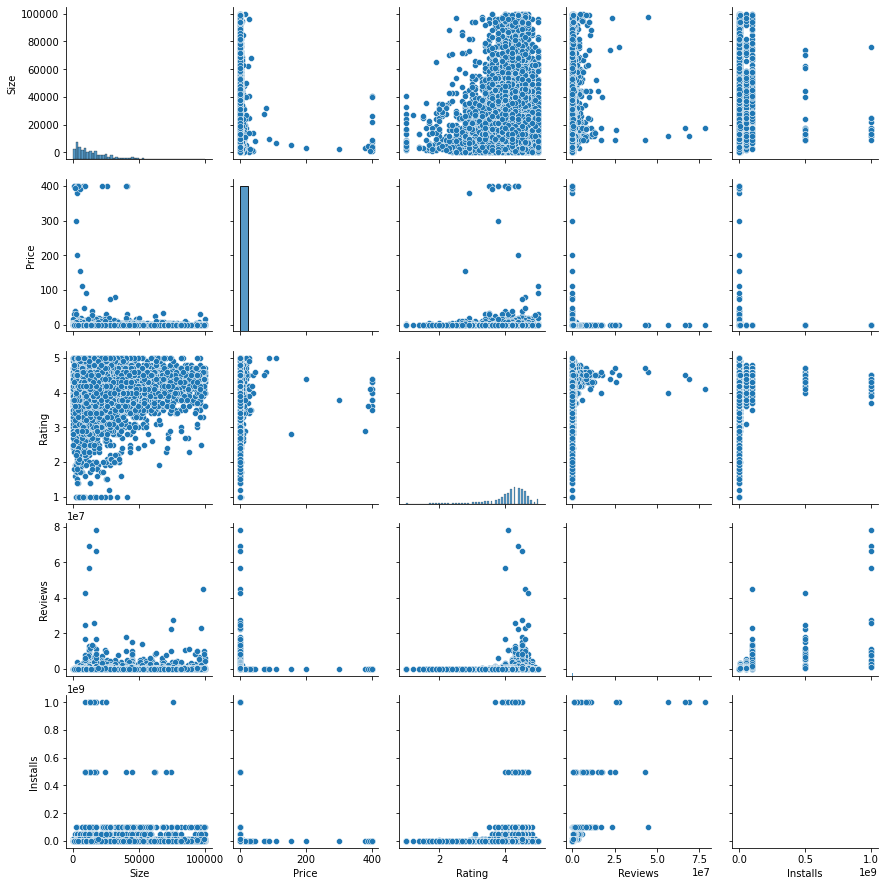

In [2612]:

# Visualizing the pairplot of numerical data 
sns.pairplot(numerical_data[["Size","Price","Rating","Reviews","Installs"]])

### Note : (play_store_paid) is a dataframe that contains only apps under paid category

<a id ="common_price_range"></a>
## 7.3.1 What is the common range of price that most of the apps have?

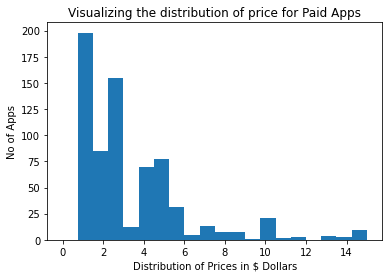

In [2613]:
# Visualizing the histogram of price of paid apps to check the distribution of prices
plt.hist(play_store_paid["Price"],bins=20,range=[0,15])
# Assigning title
plt.title('Visualizing the distribution of price for Paid Apps')
# Renaming label for y axis
plt.ylabel('No of Apps')
# Renaming label for x axis
plt.xlabel('Distribution of Prices in $ Dollars')
plt.show()

 - by this histogram plot above we can conclude that people tend to buy the apps with less price 
 - i.e the price range between 1 and 6 dollars <br>


<a id ="negative_cor_price_installs"></a>
## 7.3.2 What is the range of price that maximum customers tend to buy?

<AxesSubplot:xlabel='Price', ylabel='Installs'>

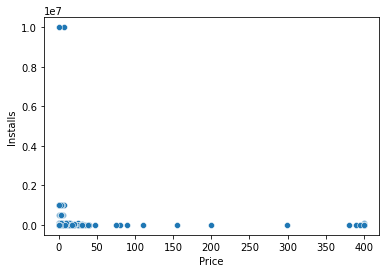

In [2614]:
# Visualizing the scatterplot of Price column and Installs column
sns.scatterplot(x=play_store_paid["Price"],y=play_store_paid["Installs"])

- By this scatterplot we can conclude that apps with lesser price are installed more
- i.e lesser the price more the installs ***(purchase)*** are more 
- if one variable increases and other variables decrease that means we it negative coorelation <br>
the negative correlation between the Installs and price is not clearly visible in graph <br>
But we can see the proof in below two cells
<a id ="proof_negative_corr_price_Installs"></a>

In [2615]:
# Printing the average number of installs for the apps having price below 12 dollor
play_store_paid[play_store_paid["Price"]< 12]["Installs"].mean()

82461.34497816594

In [2616]:
# Printing the average number of installs for the apps having price above 12 dollor
play_store_paid[play_store_paid["Price"]> 12]["Installs"].mean()

10346.91304347826

- average  of installs for apps having price below 12 dollar is approximately around 82460
- average of installs for apps having price more than 12 dollars is approximately arounf 10346 <br>

- By this relation of less price more installs and more price less installs 
- we can tell that installs and price are negatively correlated

Conclusion Need to keep less price for high probability of apps to get purchased 

In [2617]:
# Printing the correlation of columns of paid apps
play_store_paid.corr()

,Rating,Reviews,Size,Installs,Price,Year,Month,Date,Total_profit
Rating,1.000000,0.143591,0.100160,0.058881,-0.123015,0.126310,-0.021886,0.004914,0.000504
Reviews,0.143591,1.000000,0.192935,0.520759,-0.052577,0.063426,0.065947,-0.043392,0.312115
Size,0.100160,0.192935,1.000000,0.090700,-0.065985,0.187386,0.028133,-0.005302,0.015838
Installs,0.058881,0.520759,0.090700,1.000000,-0.021525,0.060151,0.027199,-0.000486,0.672686
Price,-0.123015,-0.052577,-0.065985,-0.021525,1.000000,0.092848,0.026759,-0.034106,0.228689
Year,0.126310,0.063426,0.187386,0.060151,0.092848,1.000000,-0.157850,0.011861,0.063345
Month,-0.021886,0.065947,0.028133,0.027199,0.026759,-0.157850,1.000000,-0.106067,-0.008831
Date,0.004914,-0.043392,-0.005302,-0.000486,-0.034106,0.011861,-0.106067,1.000000,0.016512
Total_profit,0.000504,0.312115,0.015838,0.672686,0.228689,0.063345,-0.008831,0.016512,1.000000


<a id ="proof_negative_corr_price_Installs_heat_map"></a>

<AxesSubplot:title={'center':'Heatmap of paid apps'}>

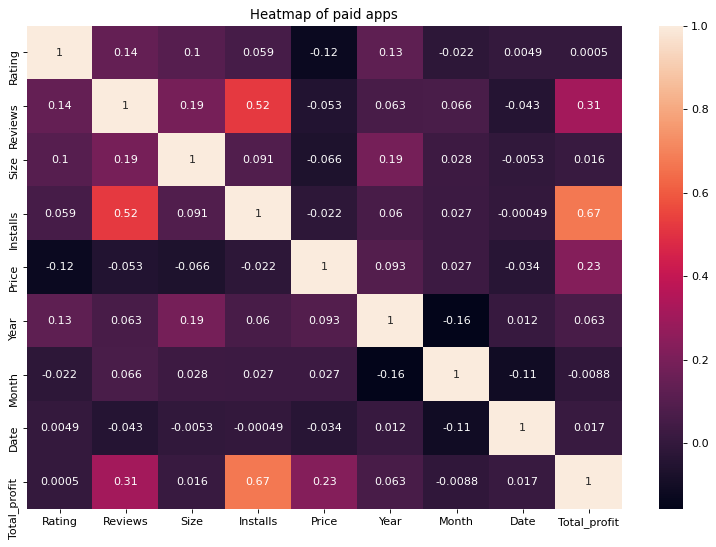

In [2618]:
# setting the size of the figure
plt.figure(figsize=(12,8),dpi=80)
# Assigning title
plt.title('Heatmap of paid apps')
# Visualizing the heatmap of coorelation matrix of paid apps
sns.heatmap(play_store_paid.corr(),annot=True)

## 7.3.3 Which category of paid apps have max average of the purchases ?

In [2619]:
# Group by Category and storing the mean of Installs into a vairable
mean_installs=play_store_paid.groupby("Category")["Installs"].mean().reset_index()
mean_installs

,Category,Installs
0,ART_AND_DESIGN,5333.333333
1,AUTO_AND_VEHICLES,16716.666667
2,BOOKS_AND_REFERENCE,832.714286
3,BUSINESS,17731.250000
4,COMMUNICATION,50372.222222
5,DATING,1891.666667
6,EDUCATION,150500.000000
7,ENTERTAINMENT,100000.000000
8,EVENTS,1.000000
9,FAMILY,112840.513661


<a id="Average_of_max_Installs_based_on_category"></a>

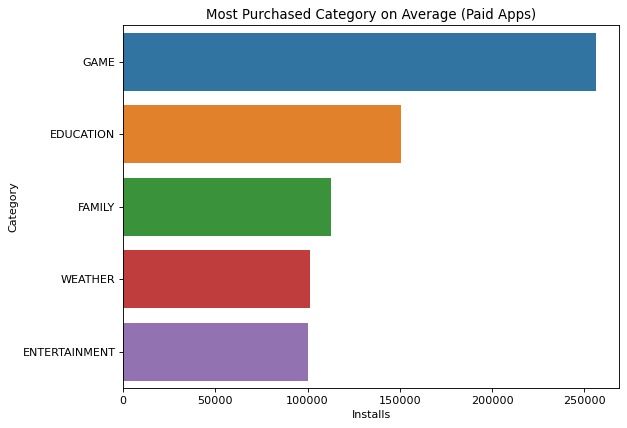

In [2620]:
# setting the size of the figure
plt.figure(figsize=(8,6),dpi=80)
# Assigning title
plt.title('Most Purchased Category on Average (Paid Apps)')
# Visualizing the barplot of top 10 purchased apps based max average of Installs
sns.barplot(x="Installs",y="Category",data=mean_installs.sort_values('Installs',ascending=False).head())
plt.show()

 - The top 5 categories that have most of the purchases <br>
 Conclusion If you need to make profit from paid apps its better to develop upon these top 5 categories

## 7.3.4 Which are top 10 categories that has most paid apps in it
<a id="category_having_max_paid_apps"></a>

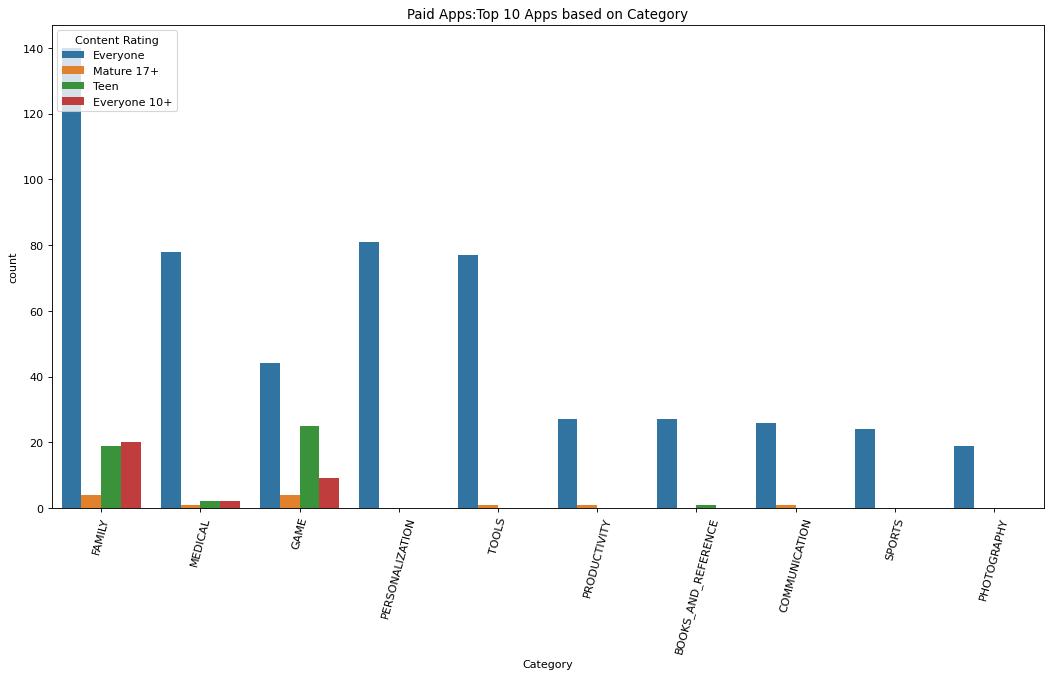

In [2621]:
# setting the size of the figure
plt.figure(figsize=(16,8),dpi=80)
# rotating the x axis labels to 75 degree
plt.xticks(rotation=75)
# Assigning title
plt.title('Paid Apps:Top 10 Apps based on Category')
# Visualizing the countplot to Category of paid apps
sns.countplot(x="Category",hue="Content Rating",data=play_store_paid,order=play_store_paid["Category"].value_counts().iloc[:10].index)
plt.show()

 - these are catogories that have most of paid apps
 - The top 3 are
     1. Family
     2. Medical
     3. Game

# 7.4 Now lets concentrate on over all apps

 - Ratings and Installs are the key factors that determines the usage and quality of the apps

## 7.4.1 Which Category app has been more installed?

In [2622]:
# Groupingthe data by Category and calculating the sum of Installs in descengind order and reseting the index
most_downloaded_category=playstore_data.groupby(["Category"])["Installs"].sum().sort_values(ascending=False).reset_index()
most_downloaded_category

,Category,Installs
0,GAME,13878924415
1,COMMUNICATION,11038276251
2,TOOLS,8001771915
3,PRODUCTIVITY,5793091369
4,SOCIAL,5487867902
5,PHOTOGRAPHY,4649147655
6,FAMILY,4427941505
7,VIDEO_PLAYERS,3926902720
8,TRAVEL_AND_LOCAL,2894887146
9,NEWS_AND_MAGAZINES,2369217760


<a id="category_having_most_installs"></a>

<AxesSubplot:title={'center':'Total Number Installs(Sum) Vs Category'}, xlabel='Category', ylabel='Installs'>

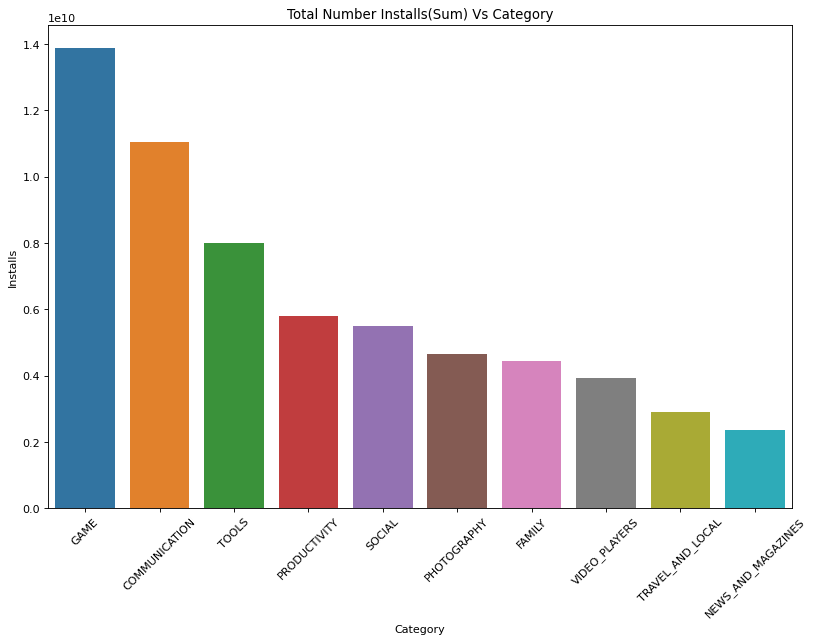

In [2623]:
# setting the size of the figure
plt.figure(figsize=(12,8),dpi=80)
# rotating the x axis labels to 45 degree
plt.xticks(rotation=45)
# Assigning title
plt.title('Total Number Installs(Sum) Vs Category')
# Visualizing the barplot of top 10 Category vs Sum of Installs
sns.barplot(y="Installs",x="Category",data=most_downloaded_category.head(10))

- These are top 10 category most downloaded
- Game category has most number of downloads

## 7.4.2 Which category is mosted rated ,which category apps are appreciated by customers, and mention the category in which more improvement is needed to reach customer's expectation?

In [2624]:
# Grouping the data by Category and calculating the average of Rating and reseting the index and storing into a variable
mean_rating=playstore_data.groupby("Category")["Rating"].mean().reset_index()
mean_rating

,Category,Rating
0,ART_AND_DESIGN,4.372656
1,AUTO_AND_VEHICLES,4.230588
2,BEAUTY,4.299057
3,BOOKS_AND_REFERENCE,4.314189
4,BUSINESS,4.141310
5,COMICS,4.196429
6,COMMUNICATION,4.147778
7,DATING,4.079240
8,EDUCATION,4.361345
9,ENTERTAINMENT,4.139216


`<a id="line_graph_of_category_vs_rating"></a>

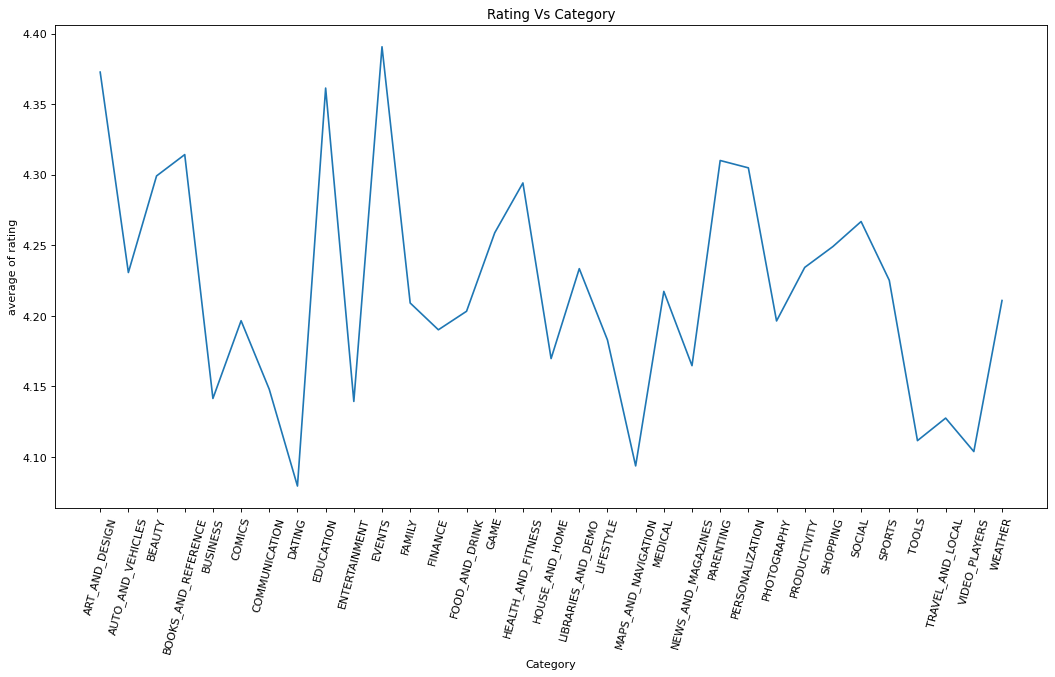

In [2625]:
# setting the size of the figure
plt.figure(figsize=(16,8),dpi=80)
# Assigning title
plt.title('Rating Vs Category')
# Renaming label for y axis
plt.ylabel("average of rating")
# rotating the x axis labels to 75 degree
plt.xticks(rotation=75)
# Visualizing the lineplot of mean value of ratings to category
sns.lineplot(y="Rating",x="Category",data=mean_rating)
plt.show()

-  Positive Feedback
 - Apps based on ***Event*** and ***Education*** Category has more average rating compared to all other apps
- Negative Feedback
 - Apps related to categories like ***Dating***, ***Maps and*** ***Navigation*** and ***Videoplayer*** need more improvement towards its quality and service towards the customers


## 7.4.3 Display the proportion of the Content rating and show which related Content rating is maximum amoung apps

In [2626]:
# Grouping the data by Content rating and calculating the count and reseting the index and storing into a variable
data_for_pie=playstore_data['Content Rating'].value_counts().reset_index()
# Calculating the Percentage of Content rating compared to over all length of dataset
data_for_pie["% of apps"]=(data_for_pie['Content Rating']/data_for_pie['Content Rating'].sum())*100
data_for_pie

,index,Content Rating,% of apps
0,Everyone,7903,81.828536
1,Teen,1036,10.726859
2,Mature 17+,393,4.069165
3,Everyone 10+,321,3.323669
4,Adults only 18+,3,0.031062
5,Unrated,2,0.020708


<a id ="proportion_of_content_rating_pie_chart"></a>

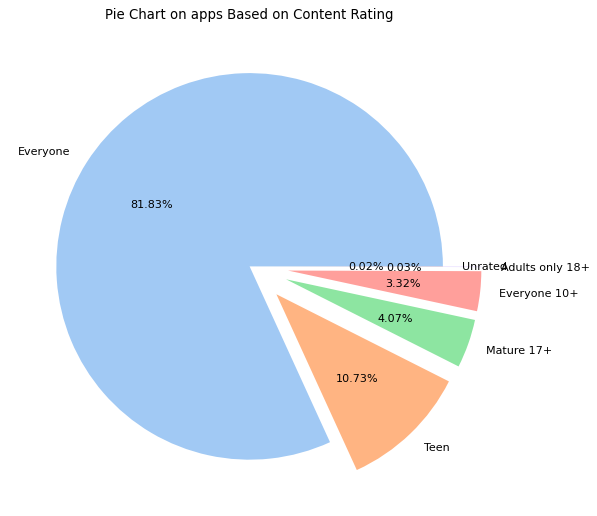

In [2627]:
# setting the size of the figure
plt.figure(figsize=(12,8),dpi=80)
# storing colors in array
colors = sns.color_palette('pastel')[0:data_for_pie.shape[0]]
# Assigning title
plt.title('Pie Chart on apps Based on Content Rating')
# Array used for explode argument in pie chart
explode=[0,0.2,0.2,0.2,0.2,0]
# Visualizing pieplot to calculate the propertion of Content Rating
plt.pie(data_for_pie["Content Rating"],labels=data_for_pie["index"],explode=explode,colors=colors,autopct='%.2f%%')
plt.show()

 - visualizing the apps proportion 
  - 80% of all the apps can be used by Everyone
  - Investing time must be less for development on Other apps having Content rating other an ***Everyone*** becasue it has less exposure

In [2628]:
# Printing the descriptive statistics of playstore_data
playstore_data.describe()

,Rating,Reviews,Size,Installs,Price,Year,Month,Date
count,9658.000000,9658.000000,9658.000000,9.658000e+03,9658.000000,9658.00000,9658.000000,9658.000000
mean,4.207258,18632.613481,19019.319704,7.778312e+06,1.099413,2017.34562,6.364051,15.631704
std,0.431570,28324.370733,17134.712893,5.376100e+07,16.853021,1.13764,2.659746,9.430666
min,3.250000,0.000000,8.500000,0.000000e+00,0.000000,2010.00000,1.000000,1.000000
25%,4.000000,25.000000,5300.000000,1.000000e+03,0.000000,2017.00000,5.000000,7.000000
50%,4.300000,967.000000,13217.535000,1.000000e+05,0.000000,2018.00000,7.000000,16.000000
75%,4.500000,29408.000000,27000.000000,1.000000e+06,0.000000,2018.00000,8.000000,24.000000
max,5.000000,73482.500000,59550.000000,1.000000e+09,400.000000,2018.00000,12.000000,31.000000


## 7.4.4 Find out Probability or range of age whos uses the apps most?
(Like above 18+ or below 18)


In [2629]:
# Group Data by Content Rating and calculating the mean data and sorting the values in descending order
rate_installs_content_rating=playstore_data.groupby("Content Rating")["Installs"].mean().sort_values(ascending=False)

<a id="max_avg_installs_to_content_rating"></a>

<AxesSubplot:title={'center':'Apps Average usage based on Content Rating'}, xlabel='Content Rating', ylabel='Installs'>

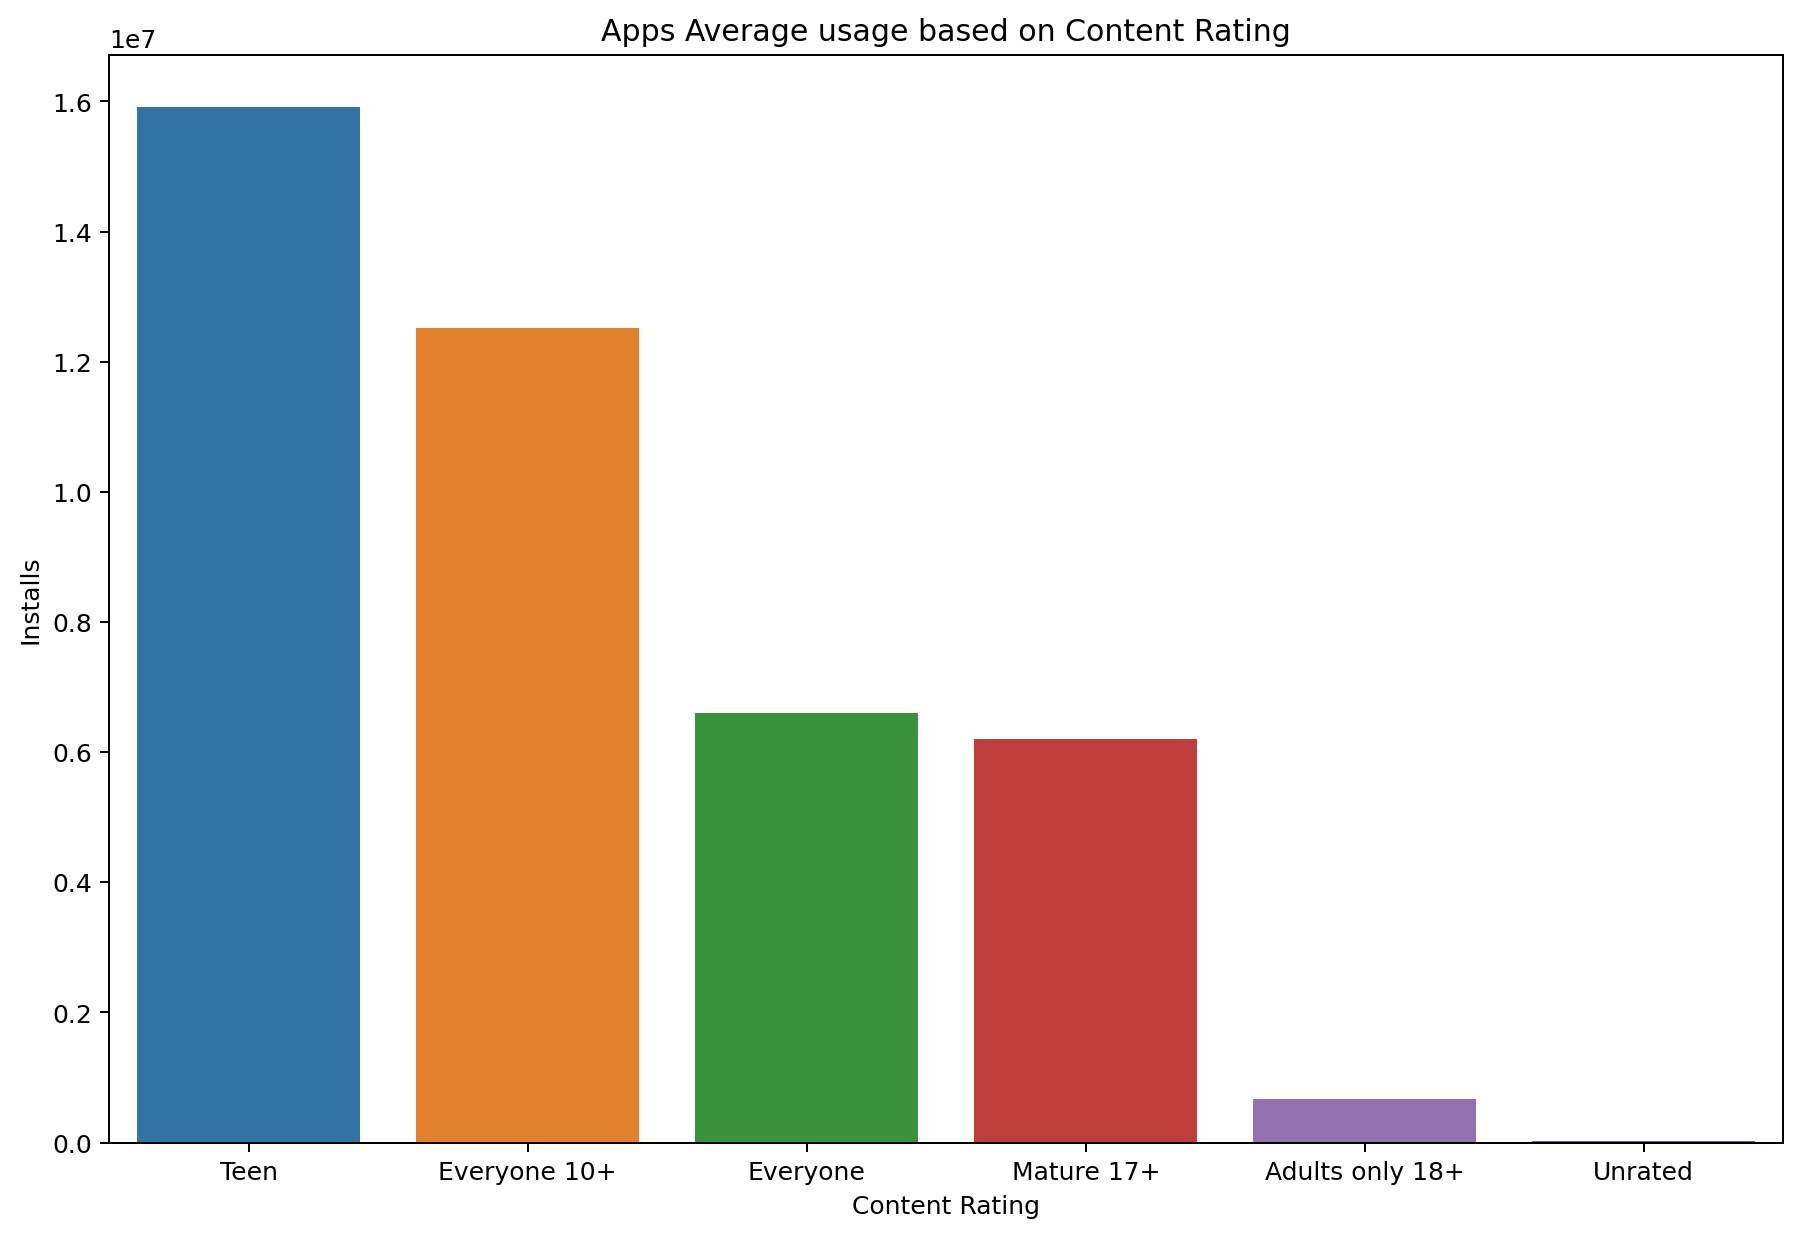

In [2630]:
# setting the size of the figure
plt.figure(figsize=(12,8),dpi=180)
# Assigning title
plt.title('Apps Average usage based on Content Rating')
# Visualizing average Installs to the Content Rating with barplot 
sns.barplot(y=rate_installs_content_rating,x=rate_installs_content_rating.index)

 - ***Teen*** Content Rated is mostly downloaded then ***Everyone 10+*** followed by ***Everyone*** <br>
 There is probability of Max downloads of apps are used by non adults (below 17) as Mature 17+ and Adults 18+ cannot be used by them
 
 Conclusion- Develop Apps that will appropriate for under ages also to use again you wll get more Installs

<a id="check_corelation_between_size_installs"></a>
## 7.4.5 Find out if customers who installed apps are feeling the size of the app as burden?

<AxesSubplot:title={'center':'Rating vs Size'}, xlabel='Size', ylabel='Rating'>

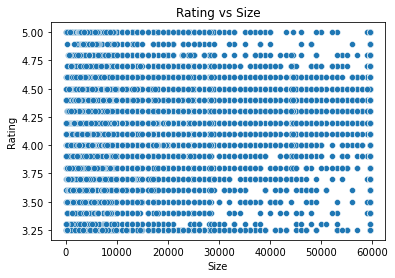

In [2631]:
# Assigning title
plt.title('Rating vs Size')
# Visualzing the Rating and Size  with scatter plot
sns.scatterplot(x='Size',y="Rating",data=playstore_data)

 - There is no much negative or positive trend seen in this graph 
 - Hence the customer are not feeling the size of the app as burden
 - If so those customers are very negligible

## 7.4.6 Which of the genres is appreciated and which genres need improvement (decide by rating)
<a id="Best_genres_with_Rating"></a>

In [2632]:
# Grouping data by Genres and calculating the mean and sorting the Rating values by descending order
genre_rating_mean=playstore_data.groupby("Genres")["Rating"].mean().sort_values(ascending=False)

<AxesSubplot:title={'center':'Apps with Best Rating'}, xlabel='Genres', ylabel='Rating'>

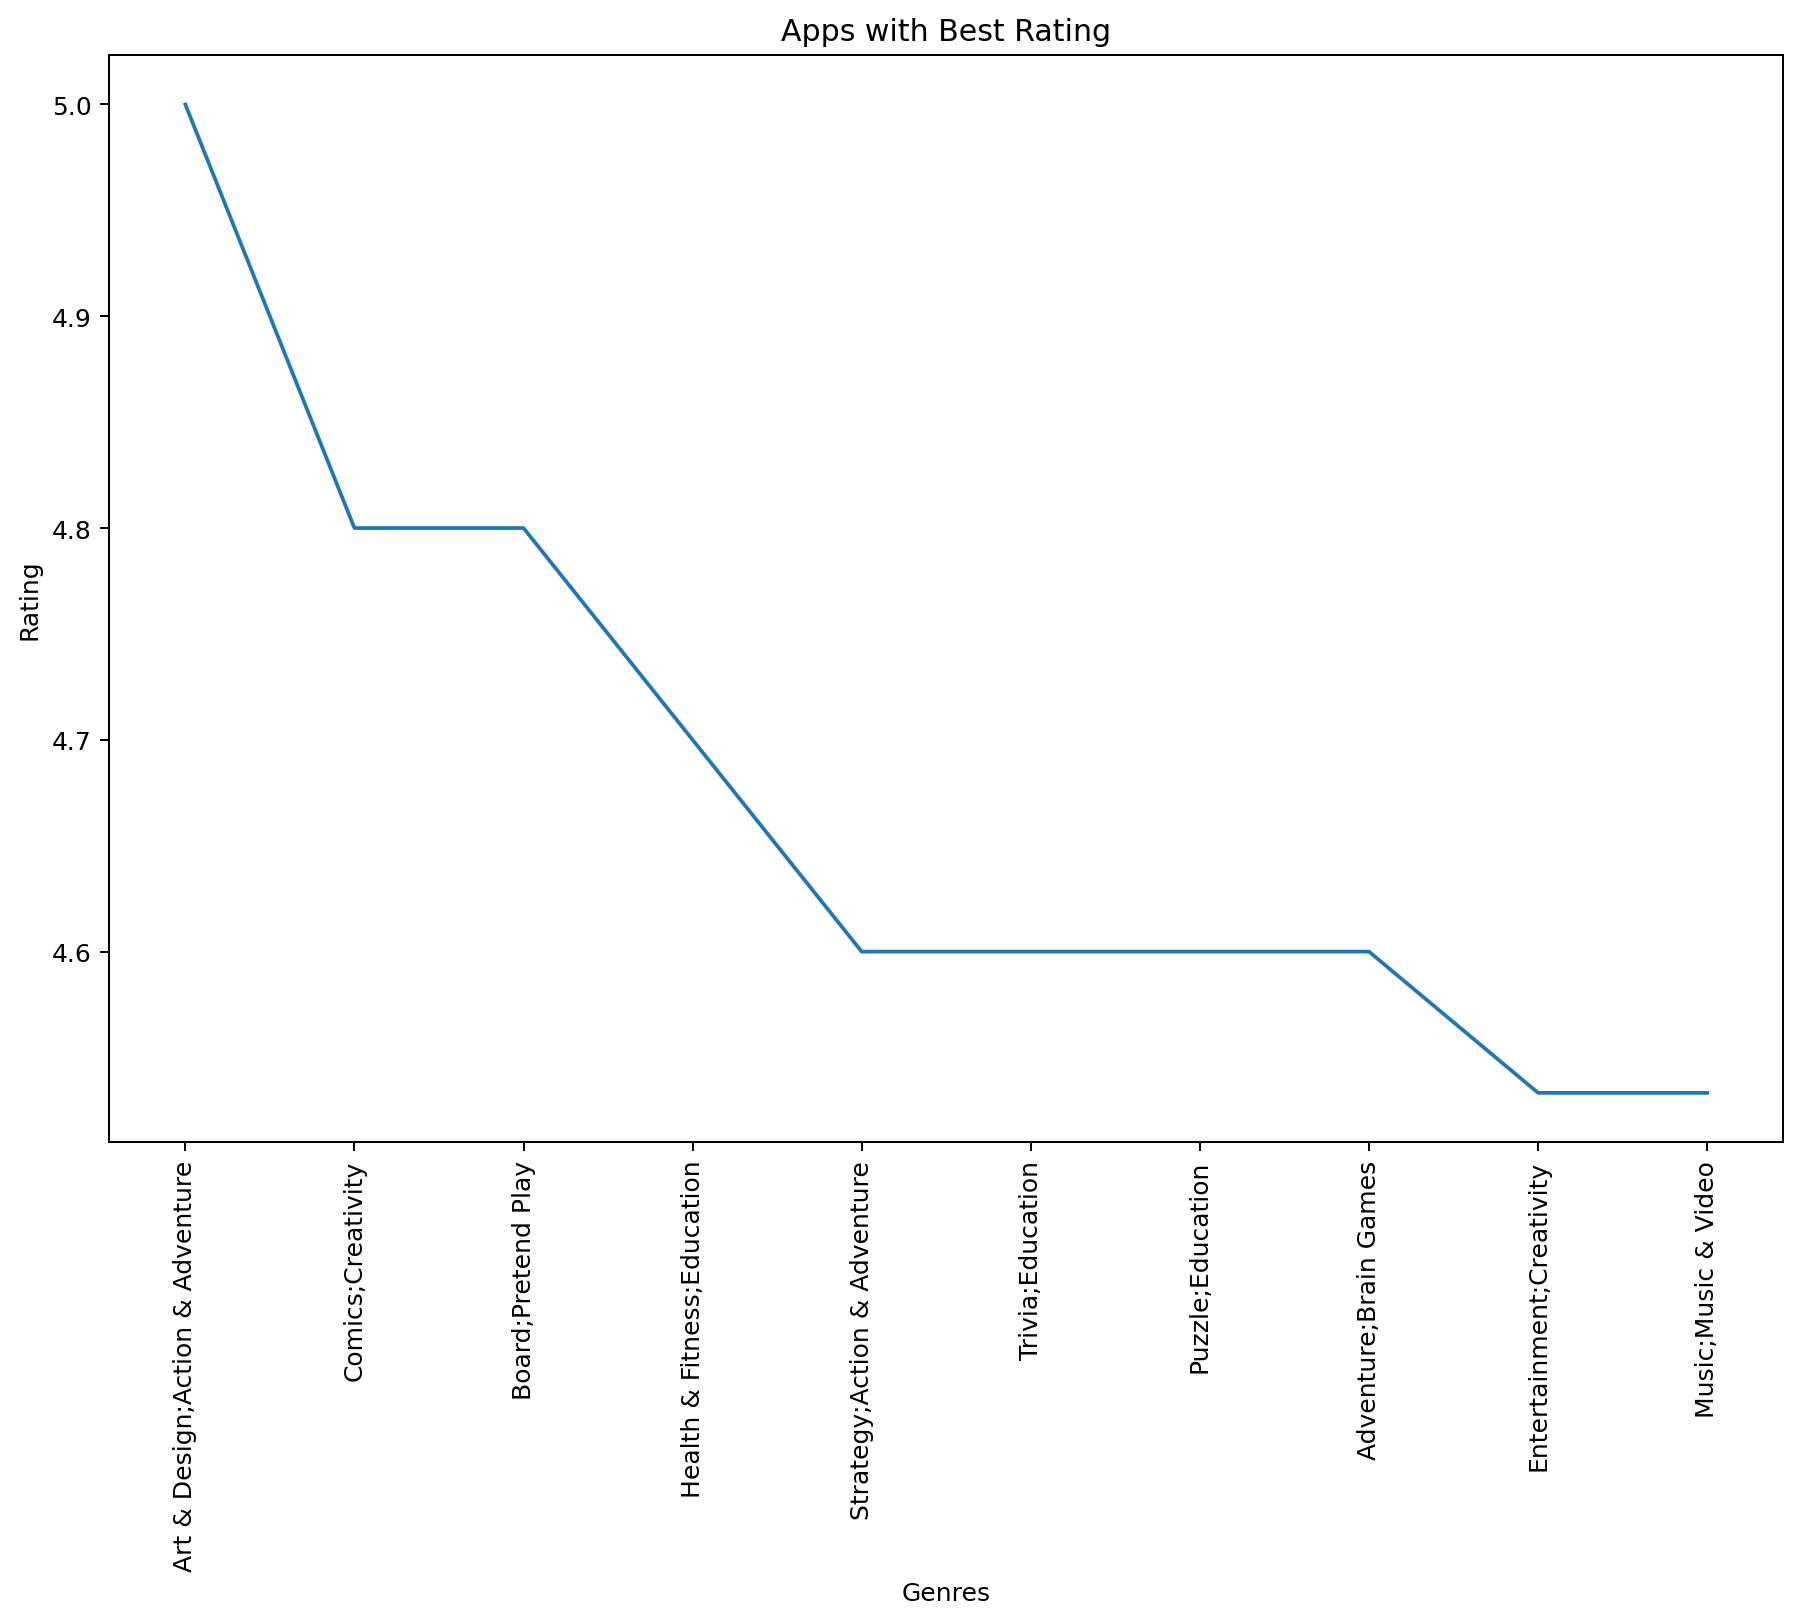

In [2633]:
# setting the size of the figure
plt.figure(figsize=(12,8),dpi=180)
# Assigning title
plt.title('Apps with Best Rating')
# rotating the x axis labels to 90 degree
plt.xticks(rotation=90)
# Visualizing the average of ratings with genres with Lineplot
sns.lineplot(y=genre_rating_mean.head(10),x=genre_rating_mean.head(10).index)

 - ***Comics:Creativity*** Genre related app has more rating followed by ***Board:Pretend Play*** and ***Health*** <br>
 These genre related apps are much appreciated
<a id="Worst_genres_with_Rating"></a> 

<AxesSubplot:title={'center':'Apps with Low Rating'}, xlabel='Genres', ylabel='Rating'>

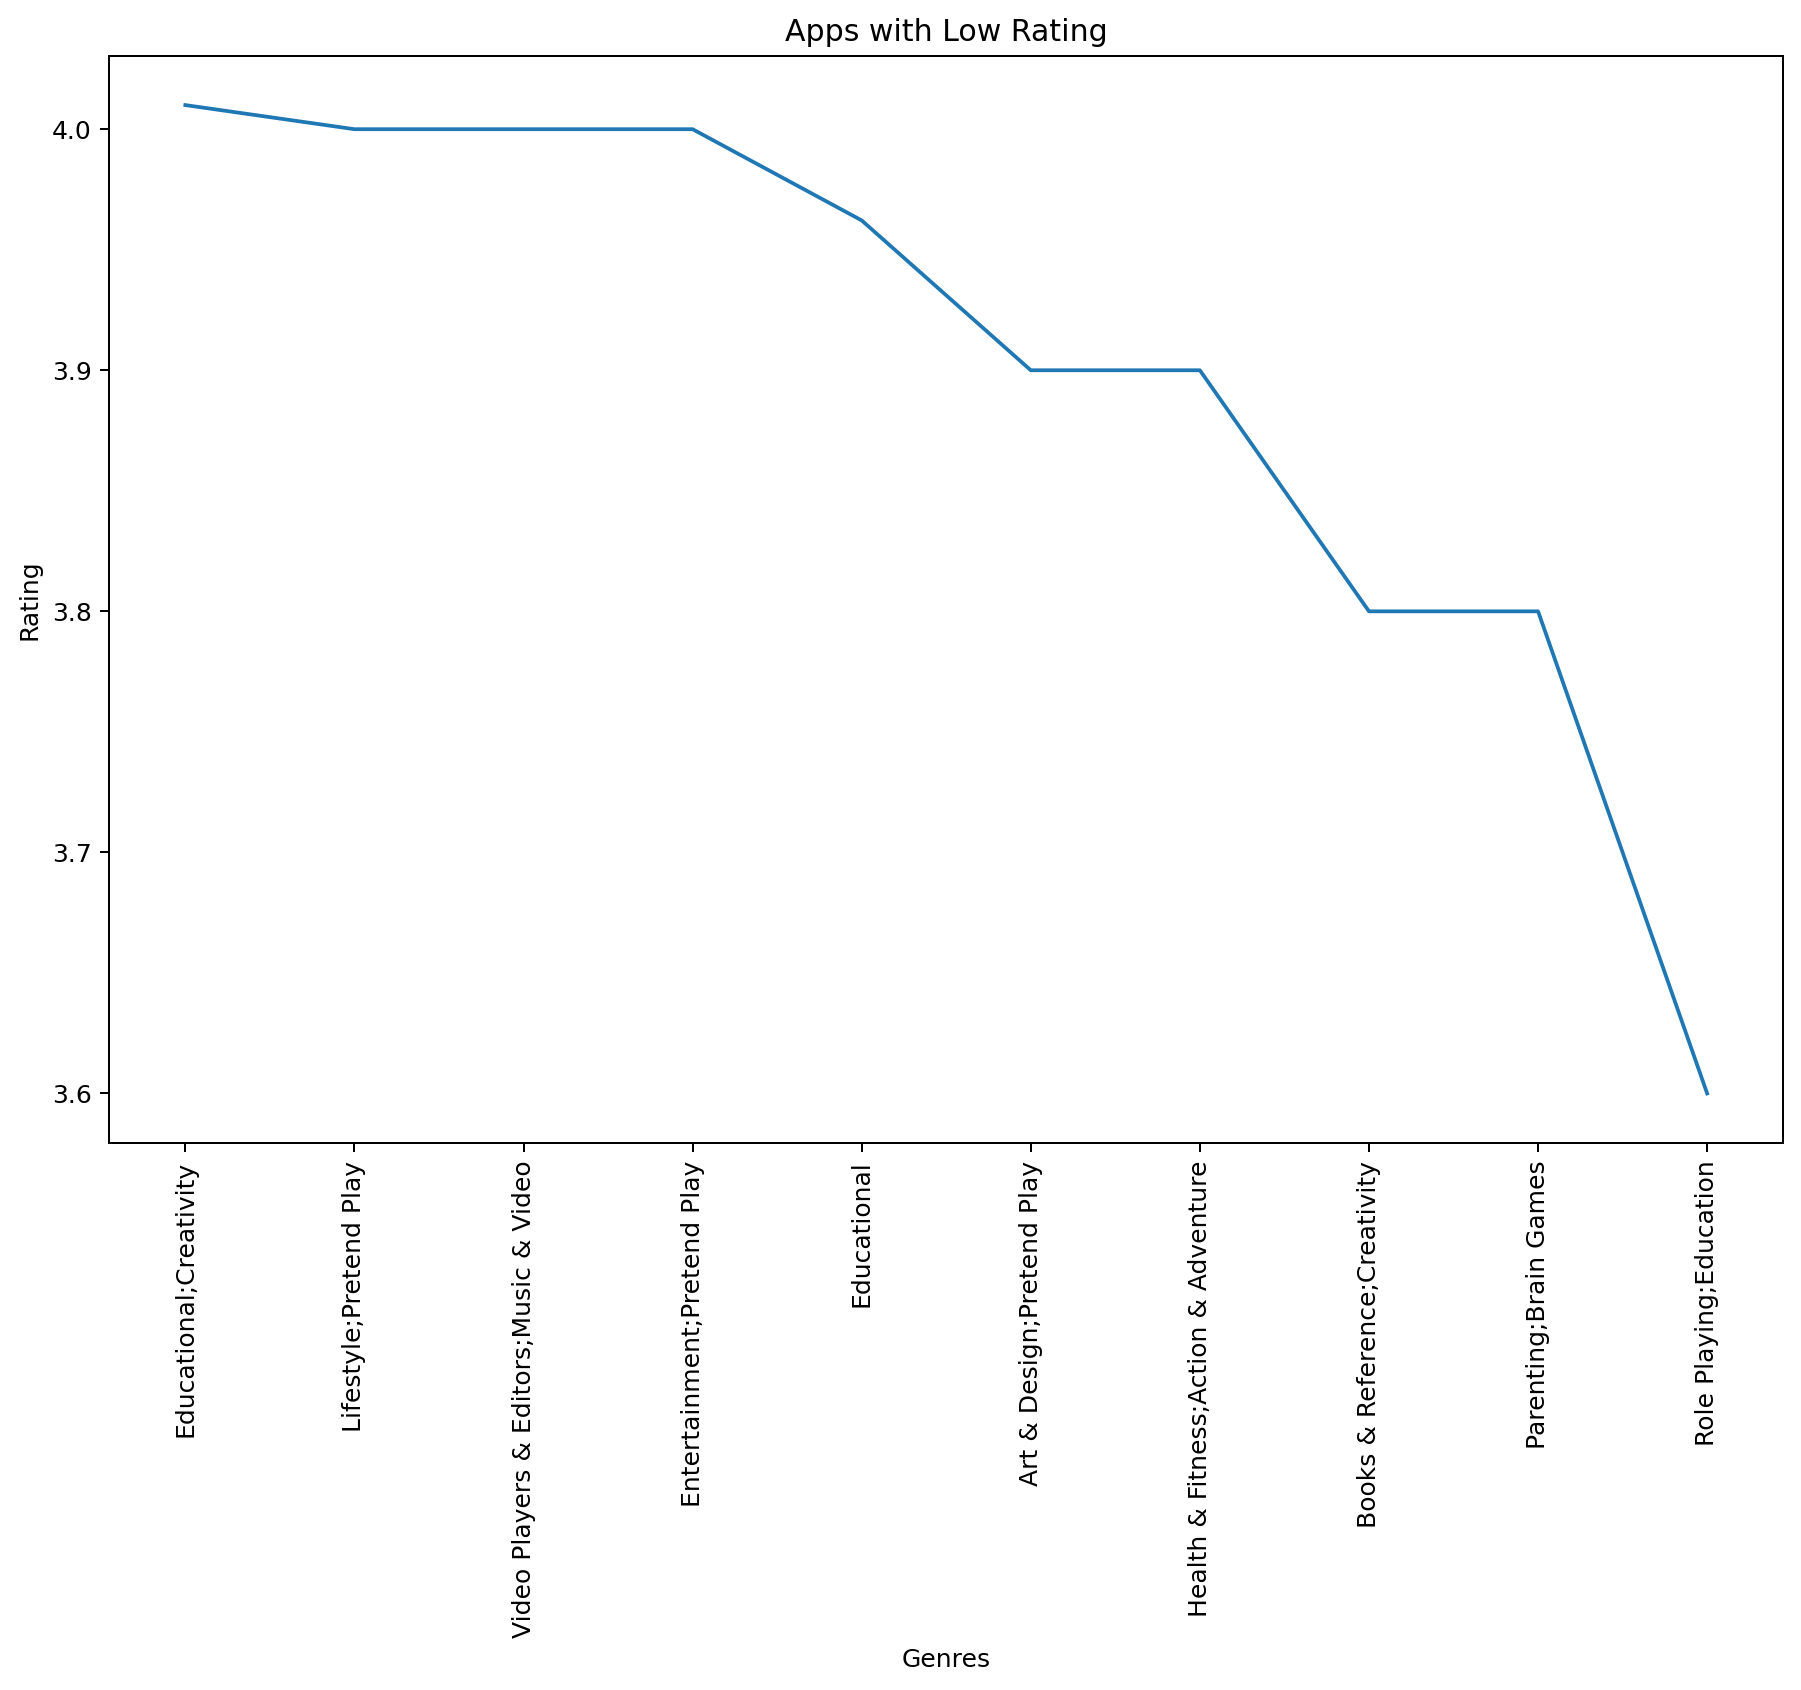

In [2634]:
# setting the size of the figure
plt.figure(figsize=(12,8),dpi=180)
# rotating the x axis labels to 90 degree
plt.xticks(rotation=90)
# Assigning title
plt.title('Apps with Low Rating')
# Visualizing the average of ratings with genres with Lineplot
sns.lineplot(y=genre_rating_mean.tail(10),x=genre_rating_mean.tail(10).index)

 - Apps related to genre like ***RolePlaying Education***, ***Parenting Brain Games*** <br>
 and other genres related apps above must be improved 
 

## 7.4.7 Visualize in which month we can see most the app updates

In [2635]:
# Grouping data by Month and calculating the average Installs
month_install_mean=playstore_data.groupby('Month')["Installs"].mean()
month_install_mean

Month
1     2.198909e+06
2     1.488107e+06
3     1.396981e+06
4     2.531348e+06
5     3.934097e+06
6     4.152566e+06
7     1.096677e+07
8     2.414868e+07
9     1.356086e+06
10    1.179058e+06
11    2.472744e+06
12    2.492907e+06
Name: Installs, dtype: float64

<a id="most_updates_vs_month"></a>

<AxesSubplot:title={'center':'Count of Apps Last Updated on Every Month'}, xlabel='Month', ylabel='count'>

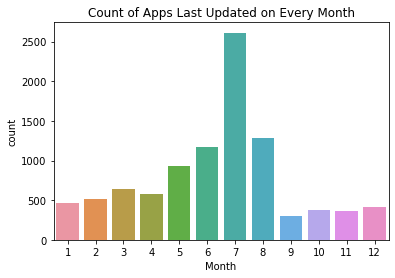

In [2636]:
# Assigning title
plt.title('Count of Apps Last Updated on Every Month')
# Visualizing Count of apps to Months with countplot
sns.countplot(x=playstore_data["Month"])

## 7.4.8 Visualize in which month's app updates lead to the maximum installs every year and check any trends between Installs and month
<a id="most_updates_in_month_vs_Installs"></a>

<AxesSubplot:title={'center':'Installs vs Month'}, xlabel='Month', ylabel='Installs'>

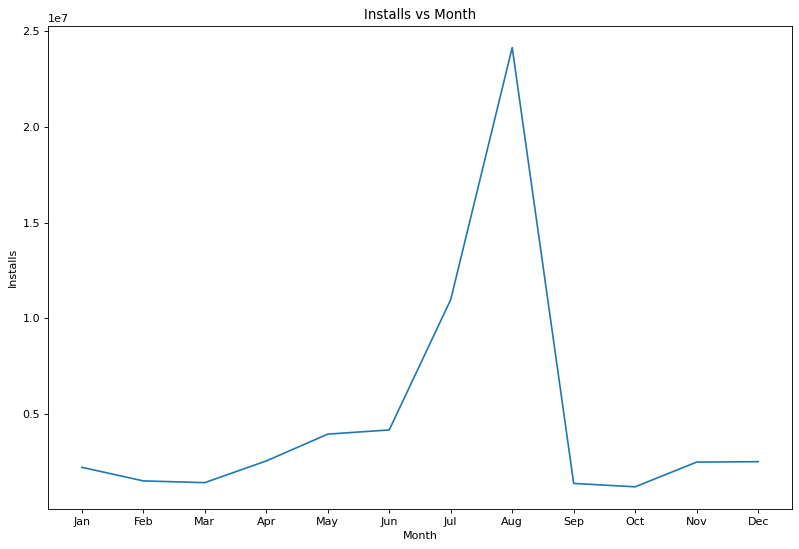

In [2637]:
# setting the size of the figure
plt.figure(figsize=(12,8),dpi=80)
# Assigning title
plt.title('Installs vs Month')
# Array of months
labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
# Resetting the xticks with Custom values
plt.xticks(month_install_mean.index,labels=labels)
# Visualizing mean of Installs with 
sns.lineplot(y=month_install_mean,x=month_install_mean.index)

 - Max updates for the apps used to release at the month of ***July*** and ***August***
 - In every year we can see that there is raise in ***Installs*** in the Month of ***July*** and ***August***
 
 - The Max Apps are getting an updated version in the month of ***July*** and ***August*** and hence we can see more downloads on the same time

<a id='visualize_second_set'></a>

## 7.5 Data Visualization of second dataset user reviews

In [2638]:
# Printing the first 5 rows of second dataset
user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


## 7.5.1 Understanding the correlation between Sentiment Polarity and Sentiment Subjectivity

In [2639]:
# Printing the correlation matirx of second dataset
user_reviews.corr()

,Sentiment_Polarity,Sentiment_Subjectivity
Sentiment_Polarity,1.000000,0.261587
Sentiment_Subjectivity,0.261587,1.000000


<a id="heat_map_second_dataset"></a>

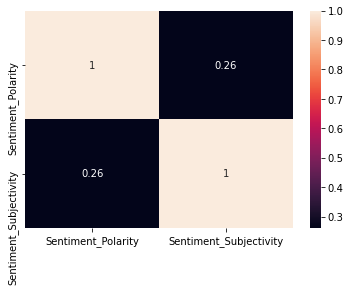

In [2640]:
# Visualizing the correlation matrix of second dataset with heatmap
sns.heatmap(user_reviews.corr(),annot=True)
plt.show()

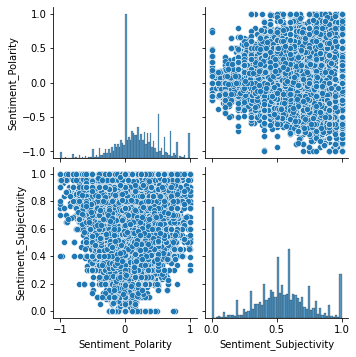

In [2641]:
# Visualizing the second data set numerical variabls using pairplot
sns.pairplot(user_reviews)
plt.show()

## 7.5.2 Find the Proportion of sentiments of customers on apps

In [2642]:
# Getting the value count of Sentiments column and storing it into a variable
sentiment_proportion=user_reviews["Sentiment"].value_counts()

<a id="proportion_of_sentiment_on_apps"></a>

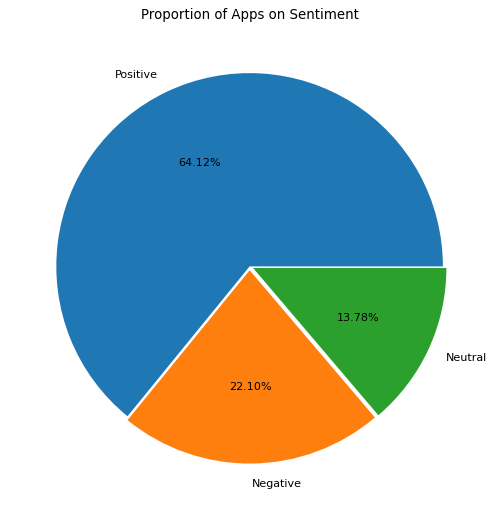

In [2643]:
# setting the size of the figure\
plt.figure(figsize=(12,8),dpi=80)
# Assigning title
plt.title('Proportion of Apps on Sentiment')
# Visualizing proportion of all sentiments using pie chart
plt.pie(x=user_reviews["Sentiment"].value_counts(),labels=sentiment_proportion.index,autopct="%.2f%%",explode=[0,0.02,0.02])
plt.show()

 - Most of the apps have positive feedback from the customers

<a id='merging_two_datasets'></a>
## 7.6 Now Lets merge the two dataset and check the sentiments of people on the apps category genres etc


In [2644]:
# Combining two dataset on basis of App name
combined_data=pd.merge(user_reviews,playstore_data,how="left",on="App")

In [2645]:
# Printing the first rows from combined dataset
combined_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month,Date
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490.0,3800.0,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,2017.0,2.0,17.0
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490.0,3800.0,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,2017.0,2.0,17.0
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH_AND_FITNESS,4.0,2490.0,3800.0,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,2017.0,2.0,17.0
3,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,HEALTH_AND_FITNESS,4.0,2490.0,3800.0,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,2017.0,2.0,17.0
4,10 Best Foods for You,Best way,Positive,1.00,0.300000,HEALTH_AND_FITNESS,4.0,2490.0,3800.0,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,2017.0,2.0,17.0


In [2646]:
combined_data.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month,Date
37422,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667,LIFESTYLE,4.1,28301.0,14754.5,1000000.0,Free,0.0,Everyone,Lifestyle,2018-07-13,12.1.0,4.1 and up,2018.0,7.0,13.0
37423,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222,LIFESTYLE,4.1,28301.0,14754.5,1000000.0,Free,0.0,Everyone,Lifestyle,2018-07-13,12.1.0,4.1 and up,2018.0,7.0,13.0
37424,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000,LIFESTYLE,4.1,28301.0,14754.5,1000000.0,Free,0.0,Everyone,Lifestyle,2018-07-13,12.1.0,4.1 and up,2018.0,7.0,13.0
37425,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000,LIFESTYLE,4.1,28301.0,14754.5,1000000.0,Free,0.0,Everyone,Lifestyle,2018-07-13,12.1.0,4.1 and up,2018.0,7.0,13.0
37426,Housing-Real Estate & Property,"Useless app, I searched flats kondapur, Hydera...",Negative,-0.316667,0.400000,LIFESTYLE,4.1,28301.0,14754.5,1000000.0,Free,0.0,Everyone,Lifestyle,2018-07-13,12.1.0,4.1 and up,2018.0,7.0,13.0


In [2647]:
# Printing the shape of combined dataset
combined_data.shape

(37427, 20)

In [2648]:
# Printing the information of combined dataset
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 37426
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     37427 non-null  object        
 1   Translated_Review       37427 non-null  object        
 2   Sentiment               37427 non-null  object        
 3   Sentiment_Polarity      37427 non-null  float64       
 4   Sentiment_Subjectivity  37427 non-null  float64       
 5   Category                35929 non-null  object        
 6   Rating                  35929 non-null  float64       
 7   Reviews                 35929 non-null  float64       
 8   Size                    35929 non-null  float64       
 9   Installs                35929 non-null  float64       
 10  Type                    35929 non-null  object        
 11  Price                   35929 non-null  float64       
 12  Content Rating          35929 non-null  object

## Removing null values

In [2649]:
# Dropping null values from combined dataset
combined_data.dropna(how="any",inplace=True)

In [2650]:
combined_data[combined_data.isna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month,Date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
37423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
37424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
37425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [2651]:
# Printing the descriptive statistics of combined dataset
combined_data.describe()

,Sentiment_Polarity,Sentiment_Subjectivity,Rating,Reviews,Size,Installs,Price,Year,Month,Date
count,35929.000000,35929.000000,35929.000000,35929.000000,35929.000000,3.592900e+04,35929.000000,35929.000000,35929.000000,35929.000000
mean,0.180904,0.493767,4.299747,45262.467171,24651.250851,4.377751e+07,0.109197,2017.728965,6.741908,15.443430
std,0.350080,0.258053,0.292353,30797.234034,17675.085937,1.453414e+08,1.302471,0.795652,1.785850,10.199869
min,-1.000000,0.000000,3.250000,114.000000,8.500000,1.000000e+03,0.000000,2011.000000,1.000000,1.000000
25%,0.000000,0.361111,4.100000,10247.000000,11766.710000,1.000000e+06,0.000000,2018.000000,6.000000,5.000000
50%,0.150000,0.514835,4.300000,64513.000000,19629.040000,5.000000e+06,0.000000,2018.000000,7.000000,16.000000
75%,0.400000,0.650000,4.500000,73482.500000,37000.000000,1.000000e+07,0.000000,2018.000000,8.000000,25.000000
max,1.000000,1.000000,4.900000,73482.500000,59550.000000,1.000000e+09,29.990000,2018.000000,12.000000,31.000000


<a id='visualizing_combined_dataset'></a>

## 7.6.1 Find the top 10 apps having most positive  and most negative feedback that has got more than 100 feedbacks

In [ ]:
# Group the data by App name and count only positive sentiment
positive_count=combined_data.groupby("App").apply(lambda x : x[x["Sentiment"]=="Positive"]["Sentiment"].count())


In [ ]:
# Group the data by App name and count the sentiment 
total_count=combined_data.groupby("App")["Sentiment_Polarity"].count()


In [ ]:
# Combining both postive count and total count to form a new dataframe
feedback_table=pd.DataFrame({"positive_feedback":positive_count,"TotalFeedback":total_count ,
              "Percentage of positive FeedBack":round((positive_count/total_count)*100,2)})

In [ ]:
# Getting app whose totalfeedback is more than 100 and filtering the top 10 Percentage of positive feedback
top_10_pos_feedback=feedback_table[feedback_table["TotalFeedback"]>100].sort_values(["Percentage of positive FeedBack"],ascending=False).head(10).reset_index()
top_10_pos_feedback

<a id ="top_10_apps_positive_feedback"></a>

In [ ]:
# Setting the size 
plt.figure(figsize=(12,8),dpi=80)
# rotating the y labels to 75 degree
plt.xticks(rotation=75)
# Assigning title
plt.title('Top 10 Apps With Most Positive Feedback  ')
# Visualizing the top 10 apps with positive feedback
sns.barplot(data=top_10_pos_feedback,y="Percentage of positive FeedBack",x="App")

 - These are the top 10 apps with that has max percentage of positive feedback with minimun 100 feedbacks


In [ ]:
# Group the data by App name and count only positive sentiment
negative_count=combined_data.groupby("App").apply(lambda x : x[x["Sentiment"]=="Negative"]["Sentiment"].count())


In [ ]:
# Combining both postive count and total count to form a new dataframe
negative_feedback_table=pd.DataFrame({"negative_feedback":negative_count,"TotalFeedback":total_count ,
              "Percentage of negative FeedBack":round((negative_count/total_count)*100,2)})
negative_feedback_table

In [ ]:
top_10_neg_feedback=negative_feedback_table[negative_feedback_table["TotalFeedback"]>100].sort_values(["Percentage of negative FeedBack"],ascending=False).head(10).reset_index()
top_10_neg_feedback

<a id ="top_10_apps_negative_feedback"></a> 

In [2495]:
# Getting app whose totalfeedback is more than 100 and filtering the top 10 Percentage of negative feedback
top_10_neg_feedback=negative_feedback_table[negative_feedback_table["TotalFeedback"]>100].sort_values(["Percentage of positive FeedBack"],ascending=False).tail(10).reset_index()
top_10_neg_feedback

KeyError: 'Percentage of positive FeedBack'

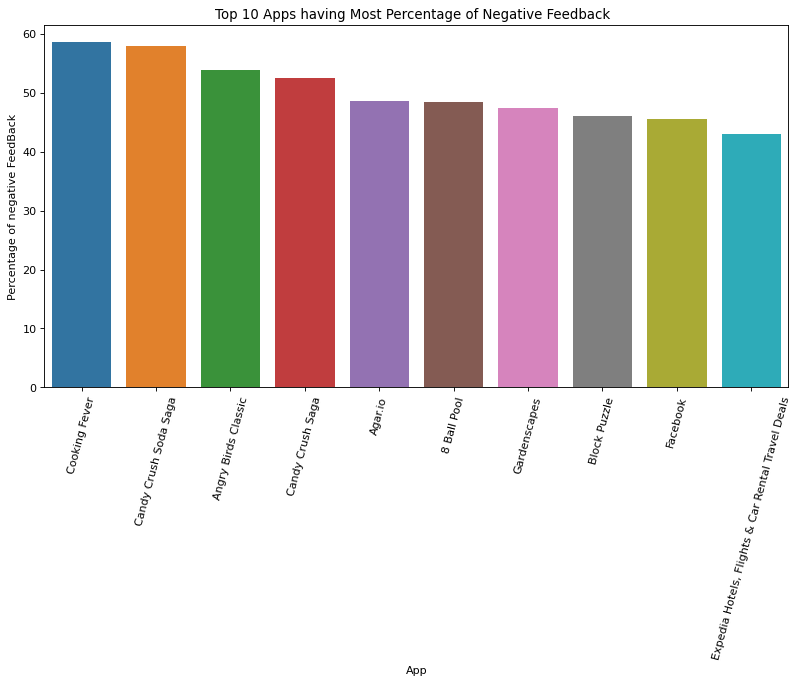

In [2502]:
# setting the figure size
plt.figure(figsize=(12,6),dpi=80)
# rotatin x label to 75 degree
plt.xticks(rotation=75)
# Assigning title
plt.title('Top 10 Apps having Most Percentage of Negative Feedback  ')
# Visualizing the top 10 apps with negative feedback
sns.barplot(data=top_10_neg_feedback,y="Percentage of negative FeedBack",x="App")
plt.show()
# px.bar(top_10_pos_feedback,y="Percentage of positive FeedBack",x="App",color=px.colors.qualitative.Plotly)

  - These are the top 10 apps with that has max percentage of negative feedback with minimun 100 feedbacks

 ## 7.6.2  What category has more size compared to each other?
<a id ="visualize_which_category_can_have_more_size"></a>  

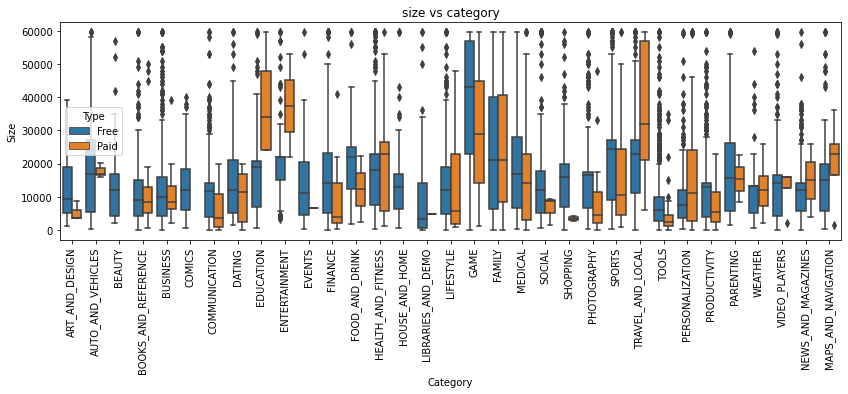

In [2453]:
# setting the figure size
plt.figure(figsize=(14,4))
# Visualizing the top most Category which has max size using boxplot
sns.boxplot(x='Category', y='Size', data=playstore_data, hue='Type')
# rotatin x label to 90 degree
plt.xticks(rotation=90);
# assigning title
plt.title('size vs category')
plt.show()

 - By this box plot we can tell that usually apps related to ***GAME*** are likely to have more Size

# Conclusions

 - [Correlation matrix](#corelation_matrix_first_dataset)
    -By the correlation matrix of playstore data we can see that reviews is more ***(positively correlated)*** correlated to Installs with a values of 0.62 and we can see the Reviews getting increased with Installs in this [scatter plot](#corelation_matrix_first_dataset_scatter_plot)
 - [Top 10 Category having most of the apps ](#most_apps_in_category) Most the apps Belong the Family Category
 - Paid Apps [Highest Earning paid Apps (Top 10)](#most_profit_making_paid_app) Minecreaft Makes the most profit
 - Apps have Price Range commonly between 1 to 6 dollars which we can see maximum apps price distribution in the [Histogram](#common_price_range)
 - Price and Installs are negatively correlated we can view it in the [scatter plot](#negative_cor_price_installs) and you can see some proof in this [cells](#proof_negative_corr_price_Installs) and price and installs are slightly negatively correlated you view the correlation in on this [heatmap](#proof_negative_corr_price_Installs_heat_map)
 - [Top 5 max average purchases of paid apps](#Average_of_max_Installs_based_on_category) Apps related to Game category is maximum purchased
 - [Top 10 category having most of the paid apps](#category_having_max_paid_apps) Most of the paid apps belong of the Family Category
 - [Category having most number of Installs](#category_having_most_installs) Game has most number of Installs
 - [Visualizing best rating of apps in Category wise to the average rating](#line_graph_of_category_vs_rating) ***Event*** and ***Education*** Category related apps have the best rating and apps related to categories like ***Dating***, ***Maps and*** ***Navigation*** and ***Videoplayer*** needs much improvement
 - Apps related to ***Content Rating*** i.e ***Everyone*** has about 80% of apps [piechart](#proportion_of_content_rating_pie_chart) 
 - Customers related to age group of ***Teenage*** has most number of Installs where you can view the [barplot](#max_avg_installs_to_content_rating)
 - Customers are not feeling the size of the apps as burden you can check the [scatter plot](#check_correlation_between_size_installs) there are no proper visible trends and also we can check in the [heatmap](#proof_negative_corr_price_Installs_heat_map) between them
 - Most apretiated Genres based the average  rating of genres are [Board Pretend Play, Comics Creativity, Health & Fitness Education and so on...](#Best_genres_with_Rating)
 - Improvement needed on Genres based the average  rating of genres are [Board Pretend Play, Health & Fitness Action Adventure,Art & and Design pretend play so on...](#Worst_genres_with_Rating)
 
 - Most of updates are released in the month of ***july*** and august  (visualized in this [barplot](#most_updates_vs_month))
 - Most of Installs are More in the month of ***July*** and ***August*** (visualized in this [lineplot](#most_updates_in_month_vs_Installs))
 - [Heat map of Second Dataset](#heat_map_second_dataset)
 - [Proportion of sentiment of the users on apps ***(Positive, Negative and Neutral)***](#proportion_of_sentiment_on_apps) 64% of customers are having positive feedback and 22% with negative feedback
 - [Top 10 apps with positive feedback](#top_10_apps_positive_feedback) with mimumim feedback count of 100 ***ColorNote Note Pad Notes*** app has the most positve feedback of approx 92%
 - [Top 10 apps with negative feedback](#top_10_apps_negative_feedback) with mimumim feedback count of 100 ***Cooking Fever,*** app has the most negative feedback of approx 58%
 - [Visualizing Which category has more size](#visualize_which_category_can_have_more_size) Apps related to ***games*** Category have maximium Size
 

Types of Data visualization plots used :
 1. Boxplot
 2. Heatmap
 3. Barplot
 4. Scatterplot
 5. Line plot
 6. Pie Chart
 7. Histogram